# Análisis de Desempeño en Cursos Introductorios de Matemática
---

In [1]:
# Importar librerias para el análisis
import warnings
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import display

sns.set_style("darkgrid")

**IMPORTANTE**: definir adecuadamente la ubicación del archivo `Mate_PI_full_clean.csv` .

In [2]:
# Definir ubicación de archivos
# En Linux/Mac:
# path = r"~/Desktop/Mate_PI/files/"
# En Windows:
path = r"~\OneDrive\Escritorio\Mate_PI\files\\"

mate_pi = pd.read_csv(path + "Mate_PI_full_clean.csv", index_col=0, dtype={"Condicion":"category", "Tipo_Cursada":"category"})

# Orden de categorías para Condicion
mate_pi["Condicion"] = mate_pi["Condicion"].cat.set_categories(
                            ["Libre", "Abandonó", "Desaprobado", "Promocionado"],
                            ordered = True)

# Colores para categoría Condicion
colores_cond=["#7f7f7f", "#ff7f0e", "#d62728", "#2ca02c"]

# Colores en diccionario, para usar cuando no estén todas las categorías presentes:
colores_cond_dict = {
    "Libre" : "#7f7f7f",
    "Abandonó" : "#ff7f0e",
    "Desaprobado" : "#d62728",
    "Promocionado" : "#2ca02c"}

# Orden de categorías para Tipo_Cursada
mate_pi["Tipo_Cursada"] = mate_pi["Tipo_Cursada"].cat.set_categories(
                            ["Verano", "1er Semestre", "Anticipada"],
                            ordered = True)

# Análisis exploratorio de los datos

**Breve descripción del dataset**

Cada registro es único, corresponde a los resultados de cada alumno, identificados por el índice de fila. No se consignan datos personales, podría haber alumnos que cursaran más de una vez, pero no disponemos de esa información.

- **1P1F**: nota del Primer Parcial, Primera Fecha. Valores `float` entre 0 y 10; si estuvo ausente se asigna -1.
- **1P2F**: nota del Primer Parcial, Segunda Fecha. Valores `float` entre 0 y 10; si estuvo ausente se asigna -1.
- **2P1F**: nota del Segundo Parcial, Primera Fecha. Valores `float` entre 0 y 10; si estuvo ausente se asigna -1.
- **2P2F**: nota del Segundo Parcial, Segunda Fecha. Valores `float` entre 0 y 10; si estuvo ausente se asigna -1.

La nota mínima para aprobar cada parcial es 4, la materia se promociona con un promedio mayor o igual a 6. 

- **F1**: nota del Flotante de Primer Parcial. Esta fecha permite recuperar el Primer Parcial si ya se logró aprobar el Segundo en las instancias anteriores. Valores `float` entre 0 y 10; si estuvo ausente se asigna -1.
- **F2**: nota del Flotante de Segundo Parcial. Esta fecha permite recuperar el Segundo Parcial si ya se logró aprobar el Primero en las instancias anteriores. Valores `float` entre 0 y 10; si estuvo ausente se asigna -1.
- **Condicion**: columna categórica, indica la condición final del alumno luego de los parciales.
    -  *Libre*: no se presentó a ningún parcial.
    -  *Abandonó*: rindió algún parcial pero no agotó las instancias posibles.
    -  *Desaprobado*: no logró aprobar Primer Parcial y Segundo Parcial luego de agotar las instancias posibles, o sí lo hizo pero no logró alcanzar el promedio de Promoción.
    -  *Promocionado*: aprobó ambos parciales con un promedio mayor o igual a 6.
- **Final**: nota final de los alumnos promocionados. Valores `int` entre 6 y 10; si no promociona se asigna 0.
- **Año**: año de la cursada. Valores `int` iniciando en 2020.
- **Tipo_Cursada**: columna categórica, indica el período en el que se realizó la cursada.
    - *Verano*: cursada intensiva de Enero-Febrero.
    - *1er Semestre*: cursada regular de Marzo-Junio.
    - *Anticipada*: cursada regular de Agosto-Noviembre.
- **Virtual**: indica si la cursada fue dictada en modalidad virtual o no. Valores `int`, asigna 1 si fue virtual y 0 si no lo fue.
- **Oral**: columna binaria. En las cursadas virtuales, además de aprobar los parciales, se requería aprobar un examen oral. Esta columna indica los resultados como *Aprobado* o *Desaprobado*, la celda está vacía si el alumno no se presentó.
- **Grupo**: columna nominal, indica nombre de la comisión de la que se extrajeron los datos. Presenta los valores *G1* y *G7* para los registros correspondientes a *1er Semestre 2022*. En los otros casos no se consigna distinción por comisiones (comisión única), la celda está vacía.

**NOTA 1: para la comisión del Verano 2020 no se registraron las notas de los alumnos Desaprobados**. Todas las columnas de Parciales están completadas con el valor 0, y las columnas de Flotantes están completadas con el valor -1.

**NOTA 2: para el análisis se reemplazarán los valores -1 correspondientes a ausentes por valores nulos (NaN)**.

In [3]:
# Reemplazo los valores -1 por registros nulos:
mate_pi = mate_pi.replace(-1, np.nan)

In [4]:
# Vista inicial del dataset
mate_pi.head()

,1P1F,1P2F,2P1F,2P2F,F1,F2,Condicion,Final,Año,Tipo_Cursada,Virtual,Oral,Grupo
0,0.0,0.0,0.0,0.0,NaN,NaN,Desaprobado,0,2020,Verano,0,NaN,NaN
1,NaN,7.0,8.2,NaN,NaN,NaN,Promocionado,8,2020,Verano,0,NaN,NaN
2,0.0,0.0,0.0,0.0,NaN,NaN,Desaprobado,0,2020,Verano,0,NaN,NaN
3,0.0,0.0,0.0,0.0,NaN,NaN,Desaprobado,0,2020,Verano,0,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,Libre,0,2020,Verano,0,NaN,NaN


In [5]:
# Descripción general del dataset
mate_pi.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1221 entries, 0 to 1222
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype   
---  ------        --------------  -----   
 0   1P1F          805 non-null    float64 
 1   1P2F          507 non-null    float64 
 2   2P1F          595 non-null    float64 
 3   2P2F          324 non-null    float64 
 4   F1            80 non-null     float64 
 5   F2            76 non-null     float64 
 6   Condicion     1221 non-null   category
 7   Final         1221 non-null   int64   
 8   Año           1221 non-null   int64   
 9   Tipo_Cursada  1221 non-null   category
 10  Virtual       1221 non-null   int64   
 11  Oral          89 non-null     object  
 12  Grupo         214 non-null    object  
dtypes: category(2), float64(6), int64(3), object(2)
memory usage: 117.2+ KB


In [6]:
# Años de los cursos registrados
mate_pi["Año"].unique()

array([2020, 2021, 2022, 2023, 2024, 2025])

## Distribución de datos por categorías: Año, Tipo de Cursada, Condición

Además de las notas obtenidas por cada estudiante, identificamos las siguientes categorías de interés:

- `Condicion`: si el alumno resultó Promocionado, Desaprobado o Libre.
- `Año`: en qué año realizó la cursada, entre 2020 y 2025
- `Tipo_Cursada`: si cursó en modalidad Verano, 1er Semestre o Anticipada.

Vamos a revisar la distribución de los datos según estas categorías.

### Distribución de datos por Año y por Cursada

Nos interesa analizar **cuántos alumnos (en promedio) se inscriben en cada modalidad cada año**.

Para ello, analicemos la distribución de los datos y calculemos el promedio buscado.

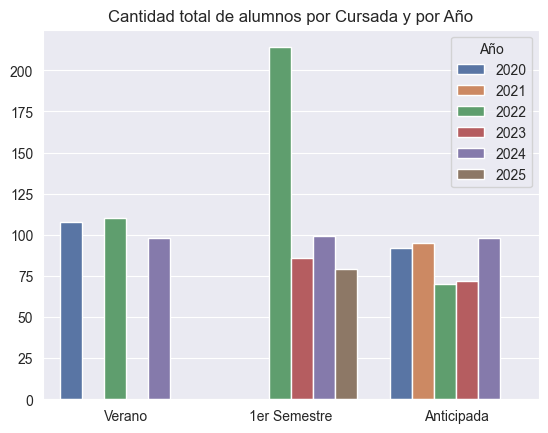

In [7]:
# Cantidad de alumnos por Año y Cursada
sns.countplot(
    data=mate_pi,
    x="Tipo_Cursada",
    hue="Año",
    palette="deep"
)
plt.title("Cantidad total de alumnos por Cursada y por Año")
plt.ylabel("")
plt.xlabel("")
plt.show()

In [8]:
# Creo una tabla para visualizar cantidad de alumnos por Cursada cada año
tabla_alumnos = pd.crosstab(mate_pi["Año"], mate_pi["Tipo_Cursada"], margins=True, margins_name="Total")
tabla_alumnos

Tipo_Cursada,Verano,1er Semestre,Anticipada,Total
Año,,,,
2020,108,0,92,200
2021,0,0,95,95
2022,110,214,70,394
2023,0,86,72,158
2024,98,99,98,295
2025,0,79,0,79
Total,316,478,427,1221


In [9]:
# Calculo cantidad anual promedio de alumnos promocionados por Cursada:
# Voy a rehacer la tabla para que no contenga las sumas parciales:
tabla_alumnos = pd.crosstab(mate_pi["Año"], mate_pi["Tipo_Cursada"], margins=False)
tabla_alumnos.replace(0, np.nan).mean()

Tipo_Cursada
Verano          105.333333
1er Semestre    119.500000
Anticipada       85.400000
dtype: float64

----------

Notamos que:

- **Faltan registros de los cursos: 1er Semestre 2020 y 2021, Verano 2021, 2023 y 2025.**
- La cantidad de registros correspondientes a 1er Semestre y Anticipada son similares.
- **En el 1er Semestre 2022 se tienen valores muy alejados del promedio**. Esto se debe a que en la base de datos hay dos comisiones distintas para ese curso: G7 y G12. 

**Tomaremos como valor representativo de 1er Semestre 2022 al promedio de las dos comisiones**, en este caso, 107 alumnos.

In [10]:
# Corrijo la tabla de cantidad de alumnos con el promedio para 1er Semestre 2022.
tabla_alumnos.loc[2022, "1er Semestre"] = 214/2

tabla_alumnos

Tipo_Cursada,Verano,1er Semestre,Anticipada
Año,,,
2020,108,0,92
2021,0,0,95
2022,110,107,70
2023,0,86,72
2024,98,99,98
2025,0,79,0


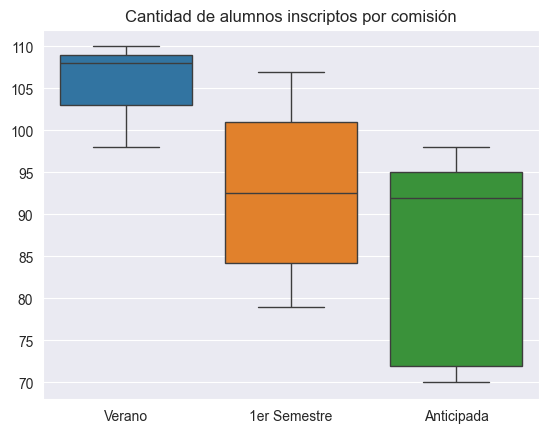

In [11]:
# Visualizo la cantidad de alumnos por Tipo de Cursada, con la tabla corregida:
sns.boxplot(data=tabla_alumnos.replace(0, np.nan))
plt.title("Cantidad de alumnos inscriptos por comisión")
plt.xlabel("")
plt.show()

In [12]:
# Calculo promedios, mediana, desviación estándar
tabla_alumnos.replace(0,np.nan).agg(["mean", "std", "median"])

Tipo_Cursada,Verano,1er Semestre,Anticipada
mean,105.333333,92.750000,85.400000
std,6.429101,12.606215,13.334167
median,108.000000,92.500000,92.000000


Podemos notar que, si bien la Anticipada muestra una mayor dispersión, la mediana de inscriptos anuales es similar a la del 1er Semestre. Ambos cursos se dictan durante el año. **La opción predilecta de cursada es la modalidad Verano**, un curso intensivo que se dicta entre enero y febrero, y **que presenta un promedio de 105 inscriptos por comisión**. 

### Distribución de datos por Condición

Nos interesa analizar **qué proporción de alumnos inscriptos logra Promocionar, son Desaprobados o quedan Libres**. A su vez, podemos desglosar el desempeño según cursada y estudiar esa distribución.

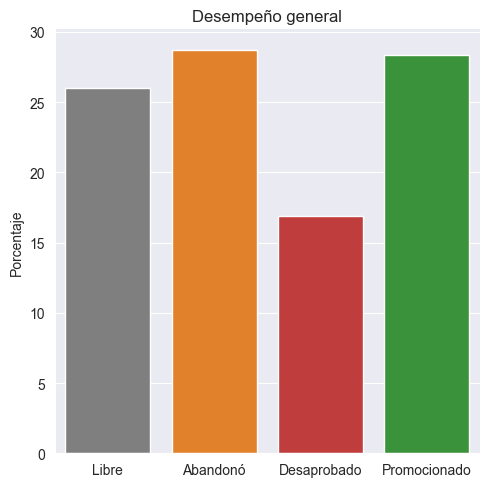

In [13]:
# Realizo un gráfico de distribución segun Condicion
sns.catplot(
    data=mate_pi,
    x="Condicion",
    hue="Condicion",
    kind="count",
    palette=colores_cond,
#   alpha=0.8,
    stat="percent"
    )
plt.title("Desempeño general")
plt.ylabel("Porcentaje")
plt.xlabel("")
plt.show()

In [14]:
# Construyo una tabla con los resultados del gráfico:
matepi_global = mate_pi["Condicion"].value_counts(normalize=True).round(3) *100
matepi_global

Condicion
Abandonó        28.7
Promocionado    28.3
Libre           26.0
Desaprobado     16.9
Name: proportion, dtype: float64

Sobre el total de la base de datos, encontramos que:

- **el 28% de los alumnos Promocionaron**: lograron aprobar la materia
- **el 26% de los alumnos quedó Libre**: no rindieron ningún parcial
- **el 29% de los alumnos Abandonó**: no agotaron las instancias de parciales
- **el 17% de los alumnos Desaprobó**: no lograron aprobar la materia luego de rendir todas las instancias.

----------

También podemos analizar la evolución del **desempeño global de los estudiantes en cada año**:

In [15]:
# Creo cada columna de la tabla manualmente:
# Dataframe: cantidad de alumnos por año
cant_por_ano = pd.DataFrame(data=mate_pi["Año"].value_counts().sort_index())
cant_por_ano.rename(columns={"count":"Cant. de alumnos"}, inplace=True)


# DataFrame: Cantidad de Promo., Libre, Desap. Abandono
tabla = pd.crosstab(mate_pi["Año"], mate_pi["Condicion"]).reset_index()

# DataFrame: merge de columna "Cant. de alumnos" en tabla
tabla = tabla.merge(
    right=cant_por_ano,
    how="left",
    left_on="Año",
    right_index=True
)

# Convierto los conteos en porcentajes:
for col in ["Libre", "Abandonó", "Desaprobado", "Promocionado"]:
    tabla[col] = tabla[col].astype("float")    # Asigno tipo de dato adecuado 
    tabla.loc[:, col] = (tabla.loc[:, col] / tabla.loc[:, "Cant. de alumnos"]) * 100
    tabla[col] = tabla[col].round(2)

# Calculo promedios de promocionados por año:
prom_por_ano = pd.DataFrame(data=mate_pi.replace(0, np.nan).groupby("Año")["Final"].mean().sort_index())

# Agrego columna de promedios en tabla
tabla = tabla.merge(
    right=prom_por_ano,
    how="left",
    left_on="Año",
    right_index=True
)

# Modifico nombre de columnas:
new_cols = {
    "Libre" : "Libre (%)",
    "Abandonó" : "Abandonó (%)",
    "Desaprobado" : "Desaprobado (%)",
    "Promocionado" : "Promocionado (%)",
    "Final" : "Nota Promedio"
}
tabla = tabla.rename( columns = new_cols )
tabla["Nota Promedio"] = tabla["Nota Promedio"].round(2)

In [16]:
# Visualizo los resultados como tabla
tabla

,Año,Libre (%),Abandonó (%),Desaprobado (%),Promocionado (%),Cant. de alumnos,Nota Promedio
0,2020,17.50,23.00,13.50,46.00,200,7.72
1,2021,30.53,27.37,17.89,24.21,95,7.48
2,2022,32.99,28.68,15.48,22.84,394,6.93
3,2023,29.75,34.18,18.99,17.09,158,6.85
4,2024,21.02,29.15,18.98,30.85,295,7.33
5,2025,18.99,32.91,18.99,29.11,79,6.61


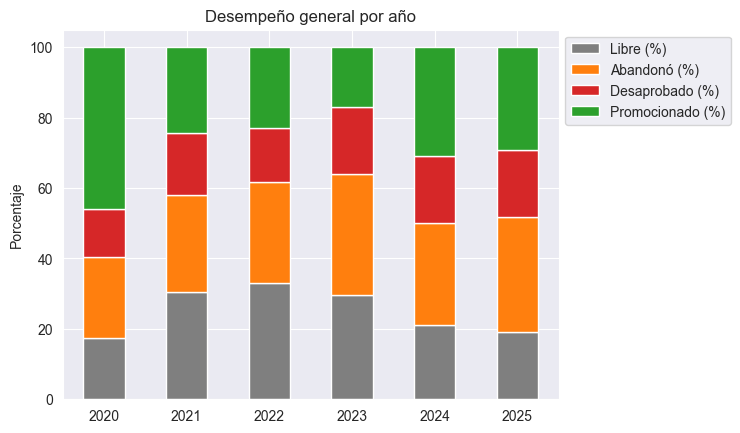

In [17]:
# Visualizo los resultados como gráfica
tabla.drop(columns=["Cant. de alumnos", "Nota Promedio"]).plot(x="Año",
                                                               kind="bar",
                                                               stacked=True,
                                                               color=colores_cond )
plt.legend(bbox_to_anchor=(1,1))
plt.title("Desempeño general por año")
plt.ylabel("Porcentaje")
plt.xlabel("")
plt.xticks(rotation=0)
plt.show()

In [18]:
# Reporto promedios y desviacion estandar de cada columna:
columnas = ["Libre (%)", "Abandonó (%)", "Desaprobado (%)", "Promocionado (%)", "Nota Promedio"]
tabla[columnas].apply([np.mean, np.std])

,Libre (%),Abandonó (%),Desaprobado (%),Promocionado (%),Nota Promedio
mean,25.130000,29.215000,17.305000,28.350000,7.153333
std,6.124984,3.665718,2.106931,9.061249,0.386465


Podemos extraer **algunas conclusiones respecto al desempeño global de los estudiantes cada año**:

- **Los promocionados obtienen en promedio una nota de 7**, con una dispersión pequeña respecto al promedio, reportando una desviación estándar de 0.39.
- De manera similar, la cantidad de Desaprobados y de Abandonó también se encuentran concentradas en torno a sus valores promedio de 17% y 29% respectivamente.
- **Los porcentajes de Promocionado y Libre muestran las mayores dispersiones**, observando desviaciones estándar de 9.07 y 6.11 respectivamente.

Será interesante analizar si esas **variaciones en porcentajes de Promocionado y Libre responden a alguna tendencia particular en el tiempo**:

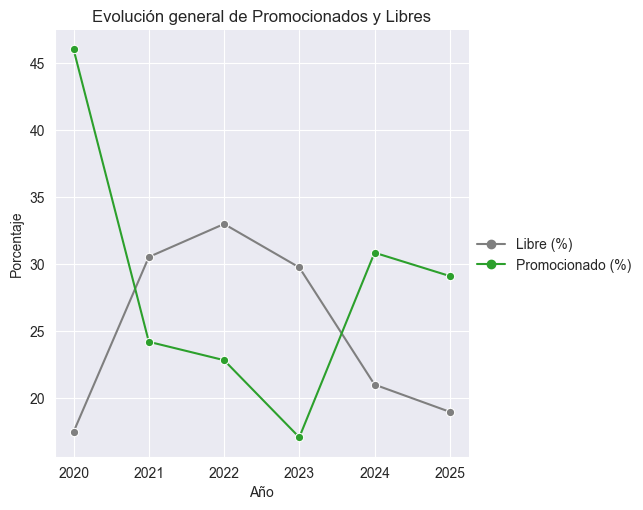

In [19]:
# Realizo un gráfico para mostrar la evolución de Promocionados y Libres en el tiempo
subset_table = tabla[["Año", "Libre (%)", "Promocionado (%)"]].set_index("Año")
sns.relplot( subset_table, 
             kind="line", 
             marker="o",
             palette=[colores_cond_dict["Libre"], colores_cond_dict["Promocionado"]], 
             dashes=False )
plt.ylabel("Porcentaje")
plt.title("Evolución general de Promocionados y Libres")
plt.show()

Si bien no puede observarse una tendencia clara para los datos presentes, cabe destacar la correlación entre variaciones de Promocionados y variaciones de Libres: **a mayor proporción de Libres, menor cantidad de Promocionados y viceversa**. Siendo que los alumnos libres son los que abandonaron la materia sin presentarse a rendir ningún parcial, se evidencia que **fomentar la retención temprana de los alumnos se condice con mejores índices de aprobación**, al menos para la muestra considerada en este estudio. 
    

### Desempeño de cada curso registrado cada año

Si bien ya vimos que faltan algunos cursos por registrar, podemos condensar **todos los resultados obtenidos en cada uno de los cursos presentes en la base de datos en un gráfico completo**:

In [20]:
# Creo una funcion para filtrar los datos por Año, Tipo_Cursada
def filtered_data(data, año, tipo_cursada):
    """
    Parameters
    ----------
    data : pandas DataFrame
    año : int
        Year to filter, from 2020 to 2025
    tipo_cursada : str
        Options: Verano, Anticipada, 1er Semestre
        
    Returns
    -------
    pandas DataFrame
    """
    return data[ (data["Año"] == año) & (data["Tipo_Cursada"] == tipo_cursada)]

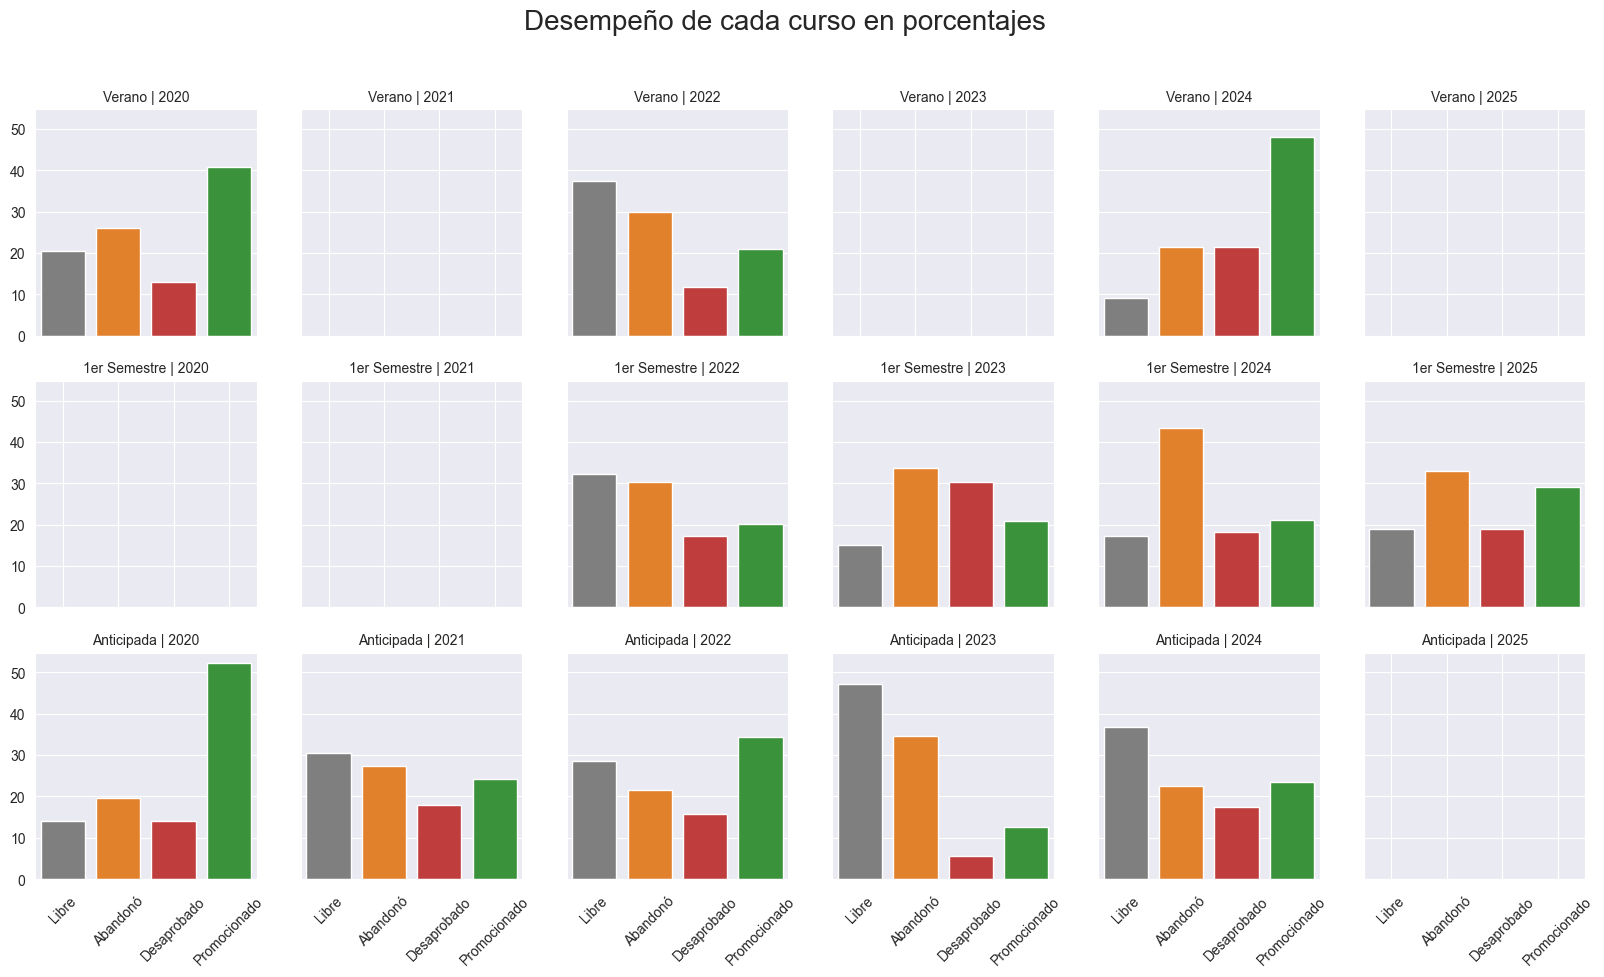

In [21]:
# Calculo los porcentajes de cada curso y los grafico:
ano_0 = mate_pi["Año"].min()
ano_f = mate_pi["Año"].max()
años = range(ano_0,ano_f+1,1)
cursadas = ["Verano", "1er Semestre", "Anticipada"]

fig, axs = plt.subplots(nrows = len(cursadas), ncols = len(años), figsize=(20,10), sharex=True, sharey=True)

for año in range(len(años)):
    for cursada in range(len(cursadas)):
        sns.countplot(
            data=filtered_data(mate_pi, años[año], cursadas[cursada]),
            x="Condicion",
            hue="Condicion",
            palette=colores_cond,
            #alpha=0.8,
            stat="percent",
            legend=False,
            ax=axs[cursada, año]
        )
        axs[cursada, año].set_title(f"{cursadas[cursada]} | {años[año]}", size=10)
        axs[cursada, año].tick_params(axis="x", size=7,rotation=45)
        axs[cursada, año].set_xlabel("")
        axs[cursada, año].set_ylabel("")

plt.suptitle("Desempeño de cada curso en porcentajes", fontsize=20)
plt.show()

En el gráfico anterior puede visualizarse el **desempeño de cada curso registrado en el dataset**. Podemos notar que **cada curso tiene sus particularidades**:

- **Durante el 2020 y el 2021, los cursos se vieron afectados por la pandemia de COVID**. Eso podría explicar la exagerada proporción de Promocionados en el curso de Anticipada 2020.
- Sólo se disponen de datos sobre 3 de los cursos del Verano, es un muestreo bajo como para detectar una tendencia.
- Los cursos disponibles de 1er Semestre parecen bastante regulares respecto a cantidad de Promocionados.
- De igual manera, podría detectarse alguna tendencia en los cursos de Anticipada, considerando lo dicho respecto al año 2020, y también teniendo en cuenta que el curso 2023 se trató de un turno nocturno que no volvió a dictarse por baja concurrencia.

## Distribución de datos por Nota Final

Habiendo analizado el desempeño general de los estudiantes del curso, **podemos realizar un perfil de los alumnos promocionados analizando las notas que obtuvieron al finalizar el curso**. Notemos que la materia se promociona necesariamente con nota mínima de 6: **no se consigna ninguna nota numérica a quienes no alcanzan la Promoción**. 

In [22]:
# Filtro según Nota Final:
finales = mate_pi[ mate_pi["Final"] >=6 ]
finales.info()

<class 'pandas.core.frame.DataFrame'>
Index: 346 entries, 1 to 1219
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype   
---  ------        --------------  -----   
 0   1P1F          317 non-null    float64 
 1   1P2F          113 non-null    float64 
 2   2P1F          327 non-null    float64 
 3   2P2F          127 non-null    float64 
 4   F1            49 non-null     float64 
 5   F2            36 non-null     float64 
 6   Condicion     346 non-null    category
 7   Final         346 non-null    int64   
 8   Año           346 non-null    int64   
 9   Tipo_Cursada  346 non-null    category
 10  Virtual       346 non-null    int64   
 11  Oral          71 non-null     object  
 12  Grupo         43 non-null     object  
dtypes: category(2), float64(6), int64(3), object(2)
memory usage: 33.4+ KB


In [23]:
# Reviso que los datos sean consistentes con la Condicion:
finales["Condicion"].unique()

['Promocionado']
Categories (4, object): ['Libre' < 'Abandonó' < 'Desaprobado' < 'Promocionado']

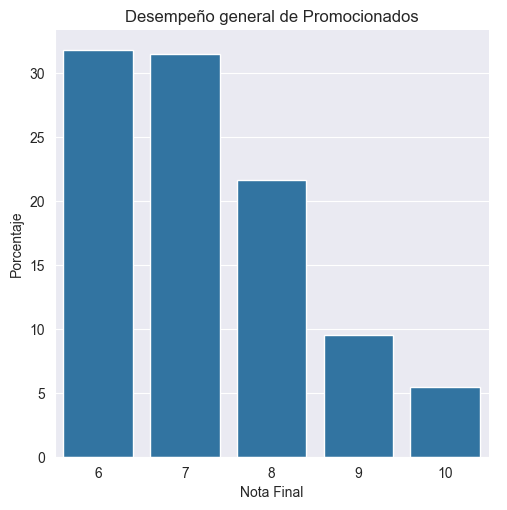

In [24]:
# Observo la distribución de notas finales:
sns.catplot(
    data=finales,
    x="Final",
    kind = "count",
    stat="percent"
)
plt.title("Desempeño general de Promocionados")
plt.ylabel("Porcentaje"),
plt.xlabel("Nota Final")
plt.show()

In [25]:
# Calculo magnitudes estadísticas: media, mediana, desviación estándar
finales[["Final"]].apply([np.mean, np.median, np.std])

,Final
mean,7.254335
median,7.000000
std,1.160051


Notamos que **la mayoría de los alumnos promocionan con notas entre 6 y 7**, siendo 7 la mediana estadística y 7,25 el valor promedio.

Es interesante también comparar el **desempeño de los alumnos promocionados según Tipo de Cursada**:

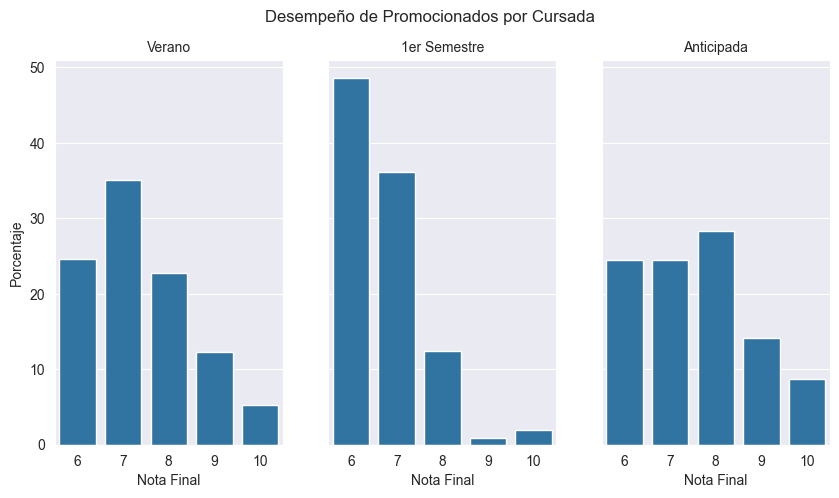

In [26]:
# Observo la distribución de notas finales separadas por Tipo_Cursada:

cursadas = ["Verano", "1er Semestre", "Anticipada"]

fig, axs = plt.subplots(ncols = len(cursadas), figsize=(10,5), sharex=True, sharey=True)

for cursada_i in range(len(cursadas)):
    sns.countplot(
        data=finales[ finales["Tipo_Cursada"] == cursadas[cursada_i]],
        x="Final",
        stat="percent",
        legend=False,
        ax=axs[cursada_i]
    )
    axs[cursada_i].set_title(f"{cursadas[cursada_i]}", size=10)
    axs[cursada_i].set_xlabel("Nota Final")
    axs[cursada_i].set_ylabel("Porcentaje")

plt.suptitle("Desempeño de Promocionados por Cursada")
plt.ylabel("Porcentaje")
plt.xlabel("Nota Final")
plt.show()

In [27]:
# Calculo magnitudes estadísticas por Tipo de Cursada:
pd.pivot_table(
    data=finales,
    index="Tipo_Cursada",
    values="Final",
    observed=False,
    aggfunc = ["mean", "median","std"]
)

,mean,median,std
,Final,Final,Final
Tipo_Cursada,,,
Verano,7.385965,7.0,1.140631
1er Semestre,6.714286,7.0,0.862847
Anticipada,7.582677,8.0,1.243657


Algunas conclusiones respecto al desempeño de los alumnos:

- **Todas las distribuciones presentan asimetría a la derecha**, la mayoría de los datos se acumulan por debajo del promedio.
- **La modalidad Anticipada muestra los mejores resultados**, con un promedio de notas de 7,58 y una mediana de 8. A su vez, presenta la mayor dispersión respecto al promedio, las notas altas (mayores que 8) son estadísticamente significativas.
- Similarmente, la modalidad Verano registra un promedio de notas de 7,39 y una mediana de 7. La asimetría en la distribución es más marcada que en el caso de la Anticipada.
- **La modalidad 1er Semestre muestra los peores resultados**, con un promedio de notas de 6,7 y una mediana de 7. La mayoría de los datos se acumulan entre las notas 6 y 7, las notas altas pueden considerarse valores atípicos en esta modalidad.

----------

En lo siguiente, **analizaremos cada Tipo de Cursada por separado**, incluyendo el análisis de los resultados en los parciales, buscando establecer un perfil de cada una.

# Análisis de resultados según Tipo de Cursada

Tras el estudio de distintas variables generales respecto al desempeño de los alumnos del curso, hemos notado que existen diferencias entre quienes cursan las distintas modalidades disponibles. Nos proponemos en lo siguiente establecer un perfil de los alumnos de cada Tipo de Cursada, a partir de los datos disponibles. **Nos enfocaremos en los siguientes aspectos**:

- **Distribución de alumnos por Condición**: Promocionados, Desaprobados, Abandonó, Libre. 
- **Permanencia**: en qué instancia se producen más abandonos.
- **Desempeño en Parciales**: proporción de aprobados, distribución de notas en cada fecha de parcial, cálculo de magnitudes estadísticas, comparación entre primera y segunda fecha de cada parcial, proporción de promocionados *antes* de la instancia de Flotante.
- **Desempeño en Flotantes**: proporción de promocionados en esa instancia, comparación de efectividad respecto a quienes recuperan Primer Parcial o Segundo Parcial.

Respecto a la modalidad Verano, consideramos que no se poseen datos suficientes como para realizar el estudio propuesto: se registraron sólo 3 años dentro del período analizado, y además en el año 2020 no se consignaron las notas numéricas de los Desaprobados. Por lo tanto, **haremos el análisis únicamente para las modalidades 1er Semestre y Anticipada**.

## Funciones necesarias para el análisis

In [28]:
# Función para generar gráficos por Tipo de Cursada:
def generador_graficos( df, cursada ):
    """
    Parameters
    ----------
    df : pandas DataFrame
    cursada : str
        Options: Verano, Anticipada, 1er Semestre
    
    Returns
    -------
    [fig1, fig2, fig3] Figure objects

    """
    # Filtro el dataset por Tipo_Cursada = cursada y Año
    filtered = df[ df["Tipo_Cursada"] == cursada ]

    # Labels de Parciales
    parciales = ["1P1F", "1P2F", "2P1F", "2P2F", "F1", "F2"]
    
    # -------------------------
    # -------------------------
    # Figura 1: distribución según Condición
    fig1, ax1 = plt.subplots()
    # Creo el container
    sns.countplot(
        data=filtered,
        x="Condicion",
        hue="Condicion",
        palette=colores_cond,
        stat="percent",
        ax=ax1
    )
    # Extraigo valores numéricos y los agrego a las barras
    for i in ax1.containers:
        ax1.bar_label(i, padding=0, fmt="%.1f", weight="bold")
    # Labels y título
    ax1.set_ylabel("Porcentaje")
    ax1.set_xlabel("")
    fig1.suptitle("Desempeño general - "+ cursada)

    # -------------------------
    # -------------------------
    # Figura 2: comparación de histogramas de cursada y de Global de la materia
    fig2, ax2 = plt.subplots()
    # Global:
    sns.histplot(
        data=df, 
        x="Condicion", 
        bins=5, 
        stat="percent", 
        alpha=0.6, 
        discrete=True,
        label="Global 2020-2025",
        ax=ax2
    )
    
    # Cursada:
    sns.histplot(data=filtered, 
                 x="Condicion", 
                 bins=5, 
                 stat="percent", 
                 alpha=0.6, 
                 discrete=True, 
                 label=cursada,
                 ax=ax2                
    )
    # Labels y título
    ax2.set_xlabel("")
    ax2.set_ylabel("Porcentaje")
    ax2.legend(bbox_to_anchor=(1,1))
    fig2.suptitle("Comparación " + cursada + " y Global")

    # -------------------------
    # -------------------------
    # Figura 3: distribución de notas para Primer Parcial y Segundo Parcial
    fig3, ax3 = plt.subplots(1,2, sharey=True, figsize=(15,5))
    # Obtengo gráficos de 1P1F y 1P2F
    for i in range(0,2):
        sns.histplot(data=filtered,
                     x=parciales[i],
                     bins=range(0,11),
                     stat="percent",
                     element="step",
                     alpha=0.8,
                     label=parciales[i],
                     ax=ax3[0])
    # Obtengo gráficos de 2P1F y 2P2F
    for i in range(2,4):    
        sns.histplot(data=filtered,
                     x=parciales[i],
                     bins=range(0,11),
                     stat="percent",
                     element="step",
                     alpha=0.8,
                     label=parciales[i],
                     ax=ax3[1])
    # Rectas verticales para demarcar notas 4 y 6
    for i in range(2):
        ax3[i].axvline(x=4, color="red", alpha=0.5, ls="--", label="Mín. para aprobar")
        ax3[i].axvline(x=6, color="green", alpha=0.5, ls="-.", label="Mayor a 6")    
    # Legend y labels
    ax3[0].legend(fontsize=10)
    ax3[0].set_xlabel("Notas")
    ax3[0].set_ylabel("Porcentaje")
    ax3[0].set_title("Primer Parcial")
    ax3[1].legend(fontsize=10)
    ax3[1].set_xlabel("Notas")
    ax3[1].set_title("Segundo Parcial")
    # Título
    fig3.suptitle("Desempeño en Parciales - " + cursada)

    # -------------------------
    # -------------------------
    # Figura 4: comparación de histogramas de Flotantes
    fig4, ax4 = plt.subplots(1,2, figsize=(15,5))
    # Obtengo gráficos para F1 y F2
    for i in range(4,6):
        sns.histplot(data=filtered,
                     x=parciales[i],
                     bins=range(0,11),
                     stat="percent",
                     element="step",
                     alpha=0.8,
                     label=parciales[i],
                     ax=ax4[i-4])
        # Rectas verticales para demarcar notas 4 y 6
        ax4[i-4].axvline(x=4, color="red", alpha=0.5, ls="--", label="Mín. para aprobar")
        ax4[i-4].axvline(x=6, color="green", alpha=0.5, ls="-.", label="Mayor a 6") 
    # Legend y labels
        ax4[i-4].legend()
        ax4[i-4].set_xlabel("Notas")
        ax4[i-4].set_ylabel("Porcentaje")
        ax4[i-4].set_title("Flotante " + str(i-3) + "˚ Parcial")

    # Título
    fig4.suptitle("Desempeño en Flotantes - " + cursada)
  
    # Prevenir display de figuras
    plt.close(fig1)
    plt.close(fig2)
    plt.close(fig3)
    plt.close(fig4)
    
    return [fig1, fig2, fig3, fig4]

In [29]:
# Función para generar curvas de supervivencia y tasa de abandono total
def curva_supervivencia( supervivencia, cursada ):
    """
    Parameters
    ----------
    supervivencia : pandas DataFrame
    cursada : string
        Options: Verano, Anticipada, 1er Semestre
        
    Returns
    -------
    fig: Figure object

    """
    # Debe intrducirse el DataFrame con la información de supervivencia necesaria:
    # columna "Etapas": label de cada etapa, desde Etapa 0 a Etapa n
    # columna "Porcentaje de Activos": float, porcentaje de activos en cada etapa
    # columna "Tasa de abandono total": float, tasa de abandono total en cada etapa
    x = supervivencia["Etapas"]
    y1 = supervivencia["Porcentaje de Activos"]
    y2 = supervivencia["Tasa de abandono total"]
    
    fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(10,5))
    # Supervivencia
    ax[0].plot(x, y1, marker="o")
    # Agrego valores numéricos a cada punto
    for i, j in zip(x,y1):
        ax[0].annotate(
            "{:.1f}".format(j),
            (i,j),
            textcoords="offset points",
            xytext=(10,10),
            ha="center"        
            )
    ax[0].set_ylabel("Porcentaje de Alumnos Activos")
    ax[0].yaxis.tick_left()
    ax[0].set_title("Curva de supervivencia")
    # Tasa de abandono total
    ax[1].plot(x, y2, marker="o", color="orange")
    # Agrego valores numéricos a cada punto
    for i, j in zip(x,y2):
        ax[1].annotate(
            "{:.1f}".format(j),
            (i,j),
            textcoords="offset points",
            xytext=(-8,12),
            ha="center"        
            )
    ax[1].set_title("Tasa de abandono total")
    ax[1].set_ylabel("Porcentaje de Alumnos que Abandonan")
    ax[1].yaxis.tick_right()
    ax[1].yaxis.set_label_position("right")
    
    fig.suptitle("Permanencia - " + cursada)
        
    # Prevenir display de figura
    plt.close(fig)
    
    return fig

In [30]:
# Función para generar tablas por Tipo de Cursada
def generador_tablas( df, cursada ):
    """
    Parameters
    ----------
    df : pandas DataFrame
    cursada : string
        Options: Verano, Anticipada, 1er Semestre
        
    Returns
    -------
    [tabla_1, tabla_2] : pandas DataFrames

    """
    # Filtro el dataset por Tipo_Cursada = cursada
    filtered = df[ df["Tipo_Cursada"] == cursada ]

    # -------------------------
    # -------------------------
    # Tabla 1: comparativa con Global según Condición
    # Calculo porcentajes generales y de cursada
    general = df["Condicion"].value_counts(normalize=True).round(3) *100
    porcentajes_cursada = filtered["Condicion"].value_counts(normalize=True).round(3) *100
    # Creo el dataframe con los datos globales y de cursada:
    compara= pd.DataFrame(
                data={
                "Global" : general,
                cursada : porcentajes_cursada}
                )
    
    # Agrego variaciones porcentuales
    compara["Dif. en ptos. porcentuales"] = (compara[cursada] - compara["Global"]).round(2)
    compara["Variación (%)"] = (compara["Dif. en ptos. porcentuales"] / compara["Global"]).round(3) *100
    tabla_1 = compara

    # -------------------------
    # -------------------------
    # Tabla 2: comparativa entre fechas de parciales
    parciales = ["1P1F", "1P2F", "2P1F", "2P2F", "F1", "F2"]
    # Tabla base: promedio y desviación estándar. El indice serán los parciales
    base = filtered[ parciales ].apply([np.mean, np.std]).transpose()
    # Agrego columna con cálculo de mediana
    base["median"] = filtered[parciales].median()
    
    # Agrego columnas con Desaprobados, Aprobados y Notas Mayor o Igual a 6
    base["Desaprobados (%)"] = ( filtered[ filtered[parciales]<4 ][parciales].count() / filtered[parciales].count() )*100
    base["Aprobados (%)"] = ( filtered[ filtered[parciales]>=4 ][parciales].count() / filtered[parciales].count() )*100
    base["Mayor o igual a 6 (%)"] = ( filtered[ filtered[parciales]>=6 ][parciales].count() / filtered[parciales].count() )*100

    # Obtengo la tabla como la transpuesta, para que las columnas correspondan a parciales
    tabla_2 = base.transpose().round(2)
    
    return [tabla_1, tabla_2]

In [31]:
# Función para generar nuevas columnas de Alumno Activo por etapas.
def columnas_por_etapas( df, cursada ):
    """
    Parameters
    ----------
    df : pandas DataFrame
    cursada : str
        Options: Verano, Anticipada, 1er Semestre
        
    Returns
    -------
    table: pandas DataFrame
    
    -------
    -------
    Voy a crear columnas para cada etapa del curso: Etapa 0, 1, 2, 3, 4
    El criterio para generar la curva de supervivencia va a ser:
        Etapa 0: rinde Primera Fecha del Primer Parcial o alguna posterior
        Etapa 1: rinde Recup. del Primer Parcial o alguna posterior, o aprueba en Primera Fecha
        Etapa 2: rinde Primera Fecha del Segundo Parcial o alguna posterior
        Etapa 3: rinde Recup. del Segundo Parcial o alguna posterior, o aprueba en Primera Fecha
        Etapa 4: rinde Flotante o ya Promocionó/Desaprobó
    
    Defino para cada alumno:
        En cada etapa: si cumple condición de Activo, consigna True. Si no, consigna False
    
    Defino para cada etapa:
        Supervivencia = Activos/Inscriptos
        Abandono = Inactivos/Inscriptos
        Supervivencia + Abandono = 1
    
    El criterio para alumno Inactivo va a ser:
        Etapa 0: todas las fechas de parciales son nulas
        Etapa 1: todas las fechas de parciales desde 1P2F son nulas, a menos que ya haya aprobado 1P1F
        Etapa 2: todas las fechas de parciales desde 2P1F son nulas
        Etapa 3: todas las fechas de parciales desde 2P2F son nulas, a menos que ya haya aprobado 2P1F
        Etapa 4: no rinde Flotante y no haya Promocionado/Desaprobado = no rinde Flotante y es Libre o Abandonó
    
    PARA SIMPLIFICAR:
        Cuando 1P1F está aprobado, asigno esa nota a 1P2F
        Cuando 2P1F está aprobado, asigno esa nota a 2P2F.
    
    Entonces, los Inactivos de cada etapa se calculan como:
        Etapa 0: todas las fechas de parciales son nulas
        Etapa 1: todas las fechas de parciales desde 1P2F son nulas
        Etapa 2: todas las fechas de parciales desde 2P1F son nulas
        Etapa 3: todas las fechas de parciales desde 2P2F son nulas
        Etapa 4: no rinde Flotante y no haya Promocionado/Desaprobado = no rinde Flotante y es Libre o Abandonó
        
    Para construir las columnas de Etapas:
        Etapa n: asigno True o False si está Inactivo y construyo la columna como Activo = ~Inactivo
    """
    # Filtro el DataFrame según cursada:
    filtered = df[ df["Tipo_Cursada"] == cursada ]

    # Creo Copia para modificar los nulos de Segundas Fechas:
    copia = filtered.copy()
    
    # Asigno la nota de 1P1F a los nulos de 1P2F si es 1P1F >=4:
    copia.loc[ (copia["1P1F"] >= 4), "1P2F"] = copia.loc[(copia["1P1F"] >= 4), "1P2F"].fillna(
                                                                                    copia.loc[ (copia["1P1F"] >= 4), "1P1F"])
    
    # Asigno la nota de 2P1F a los nulos de 2P2F si es 2P1F >=4:
    copia.loc[ (copia["2P1F"] >= 4), "2P2F"] = copia.loc[(copia["2P1F"] >= 4), "2P2F"].fillna(
                                                                                    copia.loc[ (copia["2P1F"] >= 4), "2P1F"])
    
    # Creo columnas Etapas 0 a 3 en Copia:
    parciales = ["1P1F", "1P2F", "2P1F", "2P2F"]
    n = len(parciales)
    for i in range(n):
        # Voy a asignar Inactivo=True a la fila si TODAS las columnas [parcial_i : parcial_n] son nulas, y luego Activo=~Inactivo
        copia["Etapa "+str(i)] = ~ copia[ parciales ].isna().all(axis=1)
        # Elimino el parcial de la Etapa i
        parciales.pop(0)
    
    # Para la Etapa 4: necesito dos columnas auxiliares para asignar los Inactivos
    # Columna No rinde Flotante: si F1 y F2 son nulas
    copia["No F1/F2"] = copia[["F1","F2"]].isna().all(axis=1)
    # Columna Libre o Abandonó:
    copia["L/A"] = (copia["Condicion"]=="Libre") | (copia["Condicion"]=="Abandonó")
    # Etapa 4: asigno Inactivo=True si (No F1/F2) & (L/A) es verdadero, y luego Activo=~Inactivo
    copia["Etapa 4"] = ~ copia[["No F1/F2", "L/A"]].all(axis=1)
    
    # Realizo un merge entre el dataset original y Copia para agregar las columnas Etapas:
    nuevas_cols = copia[["Etapa "+str(i) for i in range(5)]]
    table = filtered.merge(
                    right=nuevas_cols,
                    how="left",
                    left_index=True,
                    right_index=True
                    )
    return table

## Modalidad 1er Semestre

Esta modalidad de cursada se ofrece entre marzo y julio, en el primer trimestre del año. Usualmente **se compone en su mayoría de alumnos que no lograron aprobar la materia en instancias previas (recursantes)**. Sin embargo, no se dispone de información relativa a la proporción de recursantes dentro del dataset.

### Distribución por Condición

In [32]:
# Obtengo los gráficos correspondientes:
graficos = generador_graficos( mate_pi, "1er Semestre")

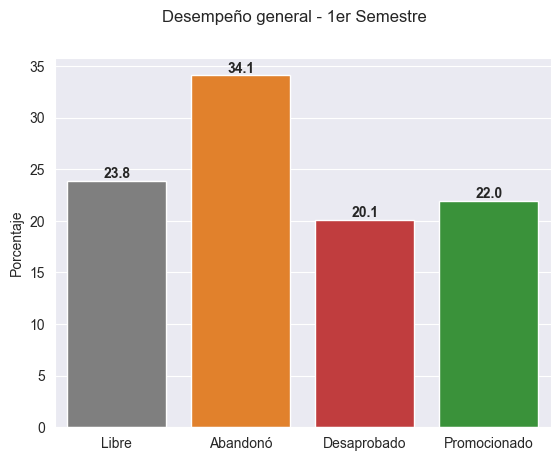

In [33]:
# Distribución por Condición para modalidad 1er Semestre:
fig = graficos[0]
display(fig)

Comparemos con los resultados obtenidos para el global de la materia:

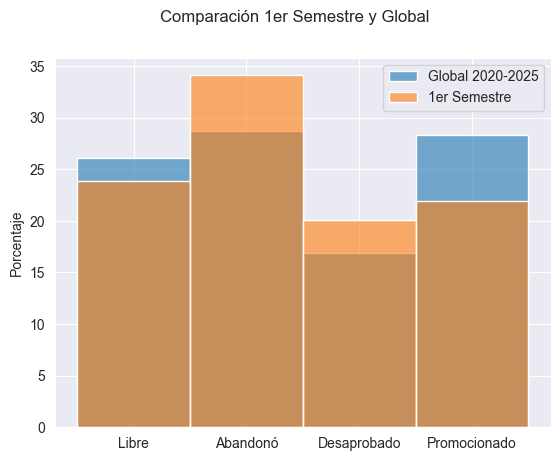

In [34]:
# Grafico en simultáneo histogramas de 1er Semestre y de Global de la materia
fig = graficos[1]
display(fig)

In [35]:
# Creo la tabla para comparar porcentajes
tabla_1S = generador_tablas(mate_pi, "1er Semestre")[0]
tabla_1S

,Global,1er Semestre,Dif. en ptos. porcentuales,Variación (%)
Condicion,,,,
Libre,26.0,23.8,-2.2,-8.5
Abandonó,28.7,34.1,5.4,18.8
Desaprobado,16.9,20.1,3.2,18.9
Promocionado,28.3,22.0,-6.3,-22.3


Notemos que:

- La tasa de abandono en la modalidad 1er Semestre se encuentra 18.4% por encima de la tasa de abandono de la materia en general: **los alumnos en esta modalidad tienden a no agotar las instancias de parcial**.
- De la misma manera, la tasa de Desaprobados se encuentra 18.9% por encima del promedio global y la tasa de promocionados se encuentra 22.3% por debajo del promedio: **esta modalidad muestra peor efectividad que el global de la materia**.
- La tasa de alumnos Libres muestra diferencia respecto a la tasa promedio, pero es menor al 10%, no tan significativa como en los otros casos.

En general puede concluirse que en la modalidad 1er Semestre la proporción de alumnos que se mantienen en la cursada es similar al promedio de la materia, pero presenta peor efectividad que el promedio, logrando una tasa de aprobados significativamente menor.

### Permanencia

Nos interesa **analizar la tasa de abandonos a lo largo de la cursada**: identificar en qué instancia es mayor la deserción en la materia. Para ello, calcularemos nuevas columnas según si el alumno se encuentra Activo en la cursada. Usaremos el siguiente criterio:

- La cursada estará dividida en 5 Etapas, y en cada una **el alumno se considera Activo** si:
    - **Etapa 0:** rinde Primera Fecha del Primer Parcial o alguna posterior
    - **Etapa 1:** rinde Recup. del Primer Parcial o alguna posterior, o ya aprobó en Primera Fecha
    - **Etapa 2:** rinde Primera Fecha del Segundo Parcial o alguna posterior
    - **Etapa 3:** rinde Recup. del Segundo Parcial o alguna posterior, o ya aprobó en Primera Fecha
    - **Etapa 4:** rinde Flotante o ya Promocionó/Desaprobó.
- En cada Etapa: **se asigna `True` si el alumno está Activo.**

Los detalles de la construcción de las columnas puede verse en los comentarios del código usado para definir la función `columnas_por_etapas`.

In [36]:
matepi_1S = columnas_por_etapas( mate_pi, "1er Semestre" )
matepi_1S.head()

,1P1F,1P2F,2P1F,2P2F,F1,F2,Condicion,Final,Año,Tipo_Cursada,Virtual,Oral,Grupo,Etapa 0,Etapa 1,Etapa 2,Etapa 3,Etapa 4
406,2.2,3.4,2.15,3.5,NaN,NaN,Desaprobado,0,2022,1er Semestre,0,NaN,G1,True,True,True,True,True
407,NaN,NaN,NaN,NaN,NaN,NaN,Libre,0,2022,1er Semestre,0,NaN,G1,False,False,False,False,False
408,NaN,NaN,NaN,NaN,NaN,NaN,Libre,0,2022,1er Semestre,0,NaN,G1,False,False,False,False,False
409,NaN,NaN,NaN,NaN,NaN,NaN,Libre,0,2022,1er Semestre,0,NaN,G1,False,False,False,False,False
410,NaN,NaN,NaN,NaN,NaN,NaN,Libre,0,2022,1er Semestre,0,NaN,G1,False,False,False,False,False


Obtengamos, en este contexto, la que llamaremos **curva de supervivencia**: la evolución de la tasa de Alumnos Activos durante el desarrollo de la cursada. 

In [37]:
Etapas = ["Etapa " + str(i) for i in range(5)]
# Calculo el porcentaje de alumnos activos en cada etapa como Activos/Inscriptos
inscriptos_1S = matepi_1S.shape[0]
supervivencia_1S = (matepi_1S[ Etapas ].sum() / inscriptos_1S).round(3) * 100
# Construyo un DataFrame para la curva de supervivencia:
supervivencia_1S = supervivencia_1S.reset_index()
supervivencia_1S = supervivencia_1S.rename(columns = {"index":"Etapas", 0:"Porcentaje de Activos"})

In [38]:
# Calculo variaciones en el porcentaje de alumnos activos y tasa de abandono total en cada etapa
# Referencia: Etapa 0
supervivencia_1S.loc[0, "Variacion"] = supervivencia_1S.loc[0, "Porcentaje de Activos"] - 100
# Para las demás etapas
for i in range(1,supervivencia_1S.shape[0]):
    supervivencia_1S.loc[i, "Variacion"] = supervivencia_1S.loc[i, "Porcentaje de Activos"] - supervivencia_1S.loc[i-1, "Porcentaje de Activos"]
# Tasa de abandono total:
supervivencia_1S.loc[:, "Tasa de abandono total"] = 100 - supervivencia_1S.loc[:, "Porcentaje de Activos"]

# Agrego tasa de promocionados en cada etapa
for etapa in Etapas:
    proporciones = matepi_1S[ matepi_1S[etapa] ].value_counts("Condicion", normalize=True)
    supervivencia_1S.loc[ (supervivencia_1S["Etapas"] == etapa), "Promocionados por etapa"] = (proporciones["Promocionado"]*100).round(1)

In [39]:
supervivencia_1S

,Etapas,Porcentaje de Activos,Variacion,Tasa de abandono total,Promocionados por etapa
0,Etapa 0,76.2,-23.8,23.8,28.8
1,Etapa 1,68.6,-7.6,31.4,32.0
2,Etapa 2,51.7,-16.9,48.3,42.1
3,Etapa 3,43.5,-8.2,56.5,50.0
4,Etapa 4,42.1,-1.4,57.9,52.2


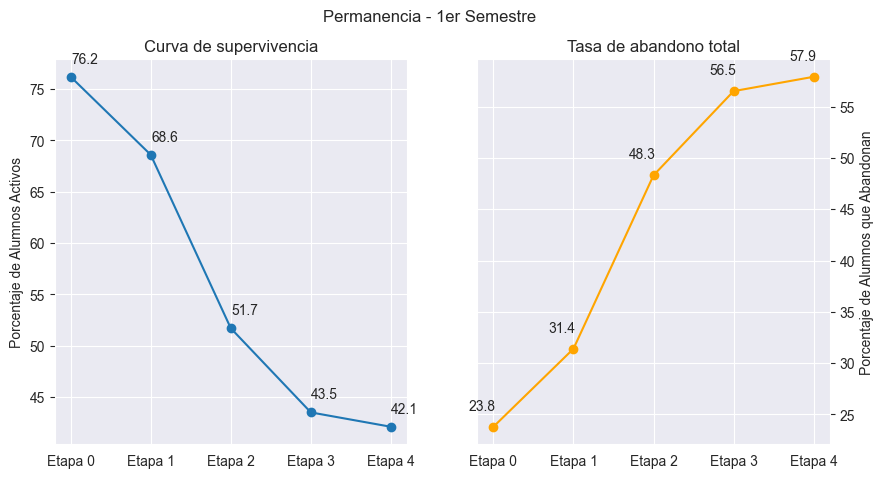

In [40]:
# Grafico curva de supervivencia y de tasa de abandono total
curvas_1S = curva_supervivencia( supervivencia_1S, "1er Semestre")
display(curvas_1S)

Podemos extraer **algunas conclusiones respecto a la retención en los cursos de 1er Semestre**:

- **En la Etapa 0**, correspondiente a la Primera Fecha del Primer Parcial, ya se observa una disminución respecto a la totalidad de alumnos inscriptos, y es **la mayor caída a lo largo del curso, de 23.8 puntos porcentuales**.
- **La segunda mayor caída en alumnos Activos se observa entre el Recuperatorio del Primer Parcial y la Primera Fecha del Segundo, correspondiente a 16,9 puntos porcentuales**. Son alumnos que han cursado la materia y decidieron abandonar durante el período entre Primer Parcial y Segundo Parcial.
- **La mayor cantidad de estudiantes se pierden antes siquiera de la primera fecha de exámenes: son los alumnos Libres**. Estos pueden haber asistido a clases, o incluso haberse inscripto pero nunca presentarse. No disponemos de información para realizar tales distinciones.
- **De quienes llegan a la Etapa 0, el 28.8% logra promocionar la materia**: es la tasa de promocionados sin considerar alumnos libres.
- **La tasa de abandono entre Primeras Fechas y Recuperatorios es similar para ambos parciales**, correspondiente a aproximadamente una diferencia de 8 puntos porcentuales de Alumnos Activos.
- Llegados a la mitad del curso, se observa una retención del 51.7% de los alumnos.
- **Hay un mayor abandono luego del Primer Parcial que luego del Segundo**:
    - Al momento de la Primera Fecha del Primer Parcial (Etapa 0), se observa una tasa de abandono del 23.8%
    - Al momento del Segundo Parcial (Etapa 2), luego de las dos instancias del Primero, la tasa de abandono total aumentó al 48.3%. Corresponde a 24.5 puntos porcentuales de diferencia.
    - Al momento del Flotante (Etapa 4), luego del Segundo Parcial, la tasa de abandono aumentó al 57.9%, únicamente 9.6 puntos porcentuales más.  
- **Menos de la mitad de los alumnos agotan las instancias de examen**, correspondiente al 42.1% del total de inscriptos. Ya hemos visto que **estos se distribuyen aproximadamente en partes iguales entre Promocionados y Desaprobados**.
- La proporción de Promocionados se estabiliza a partir de la Etapa 3: **aproximadamente el 50% de quienes rinden en Etapa 3 o en Etapa 4 logra la Promoción de la materia**.

### Parciales

En esta sección analizaremos el **desempeño de los estudiantes en cada instancia de parcial**. Recordemos la nomenclatura correspondiente:

- Para aprobar la materia (*promocionar*), **el alumno debe aprobar el Primer Parcial y el Segundo Parcial, y obtener entre ambos una nota promedio mayor o igual a 6**.
- Para aprobar cada Parcial se necesita una nota mayor o igual a 4.
- **Cada parcial posee dos instancias: Primera Fecha y Segunda Fecha**. El alumno puede presentarse a rendir en ambas fechas, pero se considera válida la última nota que obtenga.
- **Si el alumno no aprobara ninguno de los Parciales, se considera que la materia está Desaprobada**.
- **Si el alumno aprobara sólo uno de los dos Parciales, puede recuperar el restante en la instancia de Flotante**.

En el dataset se tienen los resultados obtenidos en las columnas correspondientes:
- **1P1F**: nota del Primer Parcial, Primera Fecha. Si estuvo ausente el registro está vacío.
- **1P2F**: nota del Primer Parcial, Segunda Fecha. Si estuvo ausente el registro está vacío.
- **2P1F**: nota del Segundo Parcial, Primera Fecha. Si estuvo ausente el registro está vacío.
- **2P2F**: nota del Segundo Parcial, Segunda Fecha. Si estuvo ausente el registro está vacío.
- **F1**: nota del Flotante de Primer Parcial. Esta fecha permite recuperar el Primer Parcial si ya se logró aprobar el Segundo en las instancias anteriores. Si estuvo ausente el registro está vacío.
- **F2**: nota del Flotante de Segundo Parcial. Esta fecha permite recuperar el Segundo Parcial si ya se logró aprobar el Primero en las instancias anteriores. Si estuvo ausente el registro está vacío.

#### Estadísticas generales

In [41]:
# Obtengo la tabla con la comparación entre parciales
parciales_1S = generador_tablas( mate_pi, "1er Semestre")[1]
parciales_1S

,1P1F,1P2F,2P1F,2P2F,F1,F2
mean,2.45,1.67,3.01,3.33,6.00,5.60
std,2.53,1.87,2.66,2.64,2.38,1.89
median,1.70,1.00,2.70,3.30,6.85,5.60
Desaprobados (%),70.81,84.62,62.39,53.38,13.16,18.52
Aprobados (%),29.19,15.38,37.61,46.62,86.84,81.48
Mayor o igual a 6 (%),13.58,3.85,17.09,23.65,60.53,44.44


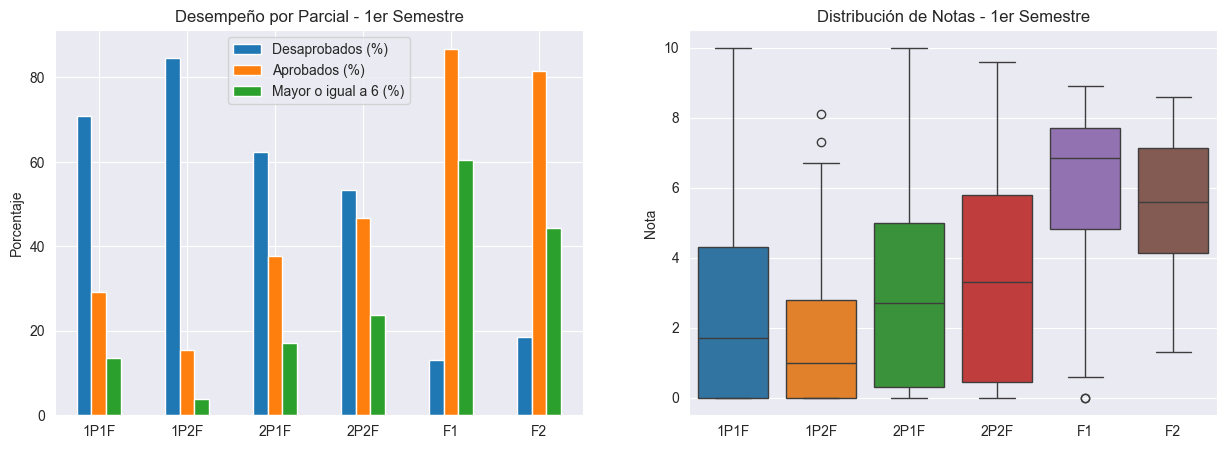

In [42]:
# Grafico los porcentajes de Aprobados y Desaprobados, y la distribución de notas de parciales
datos = parciales_1S.transpose().reset_index() # Obtengo columna de labels como "index"
parciales = ["1P1F", "1P2F", "2P1F", "2P2F", "F1", "F2"]
Primer_Sem = mate_pi[ mate_pi["Tipo_Cursada"] == "1er Semestre" ][parciales] # Parciales de 1er Semestre

fig, ax = plt.subplots(ncols=2, figsize=(15,5))
# Oculto mensajes de error: matplotlib identifica "F" como formato de timezone
with warnings.catch_warnings():
    warnings.simplefilter("ignore")
    # Desempeño por parcial
    datos.drop(columns=["mean", "std", "median"]).plot(
                                x="index",
                                kind="bar",
                                ax=ax[0])
    ax[0].tick_params(axis="x", labelrotation=0)
    ax[0].set_xlabel("")
    ax[0].set_ylabel("Porcentaje")
    ax[0].set_title("Desempeño por Parcial - 1er Semestre")
    # Distribución de notas
    sns.boxplot(data=Primer_Sem, ax=ax[1])
    ax[1].set_title("Distribución de Notas - 1er Semestre")
    ax[1].set_ylabel("Nota")
    plt.show()

Algunas conclusiones respecto al desempeño general en 1er Semestre:

- **El desempeño en Primer Parcial es notoriamente peor que en el Segundo**:
    - El promedio en 1P1F es de 2.45 y se observa un 70.8% de Desaprobados. La situación empeora en 1P2F, siendo la nota promedio de 1.67 y el porcentaje de Desaprobados de 84.6%.
    - Sin embargo, en 2P1F el promedio de notas es de 3 y desaprueba el 62.4%, mientras que la siguiente fecha el desempeño mejora, registrándose una nota promedio de 3.33 y una tasa de desaprobados de 53.4%.
    - **Se evidencia una diferencia de casi 20 puntos porcentuales entre desaprobados de Primer Parcial y Segundo Parcial**: en promedio Desaprueban 1P el 77.7% y lo hacen en 2P el 57.9%.    
- **Las peores notas se obtienen en la Segunda Fecha del Primer Parcial**, mientras que **el mejor desempeño es registrado durante el Flotante de Primer Parcial**.
- **La mayoría de quienes rinden Flotante aprueban en esa instancia**, mostrando tasas de aprobación de 86.8% en F1 y de 81.5% en F2. Sin embargo, **el desempeño es dispar en lo relativo a la consecución de notas altas**: el 60.5% consigue una nota mayor a 6 en F1 mientras que en F2 lo logra el 44.4%. **Resta analizar qué proporción de quienes rinden Flotante logran Promocionar** en esta instancia.
- En general **el desempeño en parciales previos al Flotante es pobre**: en todas las instancias la tasa de Desaprobados es mayor al 50% y las tasas de notas altas (mayores a 6) no alcanzan el 25%. Esto se condice con la asímetría a derecha que muestran sus distribuciones.

#### Evolución entre Primera Fecha y Segunda Fecha

Nos interesa analizar con detalle la **distribución de notas en Primer Parcial y en Segundo Parcial**, e identificar en qué proporción los alumnos mejoran su nota respecto a Primera y Segunda Fecha en cada Parcial

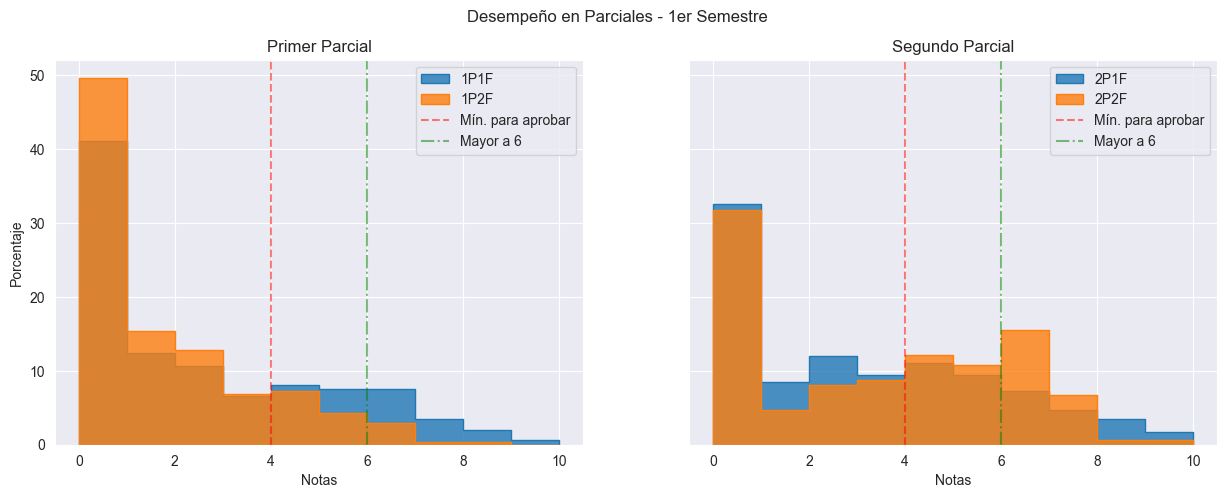

In [43]:
# Grafico las distribuciones de Primera Fecha y Segunda Fecha para cada Parcial
notas_1S = generador_graficos( mate_pi, "1er Semestre" )[2]
display(notas_1S)

Los gráficos anteriores ilustran las conclusiones anteriores: en el Primer Parcial se observan peores notas que en el Segundo, y también la asimetría a derecha es notablemente más marcada en las Fechas de Primer Parcial. En todos **los casos los valores más comunes aparecen entre 0 y 1**: aproximadamente el 30% de los alumnos en 2P no logran sumar 1 punto, y lo mismo ocurre con entre el 40% y 50% en el caso de 1P.

Veremos en lo siguiente qué proporción de alumnos que rinden Primera Fecha mejoran su nota al presentarse a Segunda Fecha.

In [44]:
# Filtro por 1er Semestre y Presentados a 1P2F
presentados1P2F_1S = mate_pi[ (mate_pi["Tipo_Cursada"] == "1er Semestre") & (mate_pi["1P2F"].notna()) ].copy()
# Creo columna Mejora_1P: True si aumenta su nota, False si no lo hace
presentados1P2F_1S.loc[:,"Mejora 1P"] = (presentados1P2F_1S["1P1F"] < presentados1P2F_1S["1P2F"])
# Calculo porcentajes
mejora_1P = presentados1P2F_1S["Mejora 1P"].value_counts(normalize=True) *100

# Lo mismo para Presentados a 2P2F
presentados2P2F_1S = mate_pi[ (mate_pi["Tipo_Cursada"] == "1er Semestre") & (mate_pi["2P2F"].notna()) ].copy()
# Creo columna Mejora_1P: True si aumenta su nota, False si no lo hace
presentados2P2F_1S.loc[:,"Mejora 2P"] = (presentados2P2F_1S["2P1F"] < presentados2P2F_1S["2P2F"])
# Calculo porcentajes
mejora_2P = presentados2P2F_1S["Mejora 2P"].value_counts(normalize=True) *100

# Calculo qué porcentaje de los que mejoran nota logran aprobar
aprueba_1P = presentados1P2F_1S[(presentados1P2F_1S["Mejora 1P"]) & (presentados1P2F_1S["1P2F"]>=4)]["1P2F"].count() \
                                                        / presentados1P2F_1S[presentados1P2F_1S["Mejora 1P"]].shape[0]

aprueba_2P = presentados2P2F_1S[(presentados2P2F_1S["Mejora 2P"]) & (presentados2P2F_1S["2P2F"]>=4)]["2P2F"].count() \
                                                        / presentados2P2F_1S[presentados2P2F_1S["Mejora 2P"]].shape[0]

In [45]:
# Creo una tabla con los resultados
mejora_recu_1S = pd.DataFrame(
    {"1P2F" : [mejora_1P[True].sum(), aprueba_1P*100],
     "2P2F" : [mejora_2P[True].sum(), aprueba_2P*100]},
    index = ["Mejora (%)", "Aprueba (%)"]
    )

In [46]:
mejora_recu_1S

,1P2F,2P2F
Mejora (%),40.170940,61.486486
Aprueba (%),32.978723,70.329670


Observamos que:

- **En el Primer Parcial**: el 40% de quienes vuelven a rendir en Segunda Fecha logran mejorar su nota, pero sólo el 32% de ellos consigue aprobar el examen. **La mayor parte de los alumnos que vuelven a rendir no logran mejorar su nota, y si lo hacen, no consiguen mejorar lo suficiente para aprobar**.
- **En el Segundo Parcial**: el 61% de quienes vuelven a rendir en Segunda Fecha logran mejorar su nota, y de ellos el 70% consigue nota suficiente para aprobar. **La mayor parte de los alumnos que vuelven a rendir mejoran su nota y consiguen aprobar el Parcial**.

Nuevamente se evidencia la mayor dificultad que presenta el Primer Parcial respecto al Segundo, para los estudiantes del 1er Semestre.

#### Promocionados antes y después del Flotante

**Analizaremos la tasa de alumnos promocionados en las instancias previas al Flotante y la correspondiente luego del Flotante**. Tengamos presente que para promocionar la materia es necesario aprobar Primer y Segundo Parcial, y promediar entre ambos una nota de 6 o más. Acceden al Flotante quienes hayan aprobado sólo uno de los Parciales, o tengan ambos aprobados pero no alcancen la nota suficiente para Promocionar.

**NOTA:** en las cursadas virtuales se requería también la condición de aprobar un examen Oral. **No incluiremos entre los Promocionados a quienes hayan Desaprobado el Oral.**

In [47]:
# Filtro por promocionados en 1er Semestre
condiciones1 = (mate_pi["Tipo_Cursada"] == "1er Semestre") & (mate_pi["Condicion"] == "Promocionado")
promo_1S = mate_pi[condiciones1]

# Verifico si rindió alguna instancia de Flotante:
rinde_flotante_1S = promo_1S[["F1","F2"]].isna()\
                                .apply(sum, axis=1) # Sumo cantidad de True por filas

# Obtengo 2 si no se presentó a Flotante, y 1 si rindió F1 o F2. Calculo proporciones
antes_despues_prop_1S = (rinde_flotante_1S.value_counts() / promo_1S.shape[0]) * 100 

# Genero la tabla con los resultados:
antes_despues_promo_1S = pd.DataFrame({"Porcentajes":antes_despues_prop_1S}).rename(index={2:"Antes de Flotante", 1:"Después de Flotante"}).rename_axis("Promocionados")

In [48]:
antes_despues_promo_1S

,Porcentajes
Promocionados,
Antes de Flotante,68.571429
Después de Flotante,31.428571


Observamos que:

- **El 68.6% de los promocionados en el 1er Semestre lo hace en las instancias previas al Flotante**.
- **El 31.4% restante lo hace en la instancia de Flotante**.
- Recordemos que los Promocionados corresponden al 22% del total del Inscriptos, con lo que encontramos que aproximadamente el 15% de los inscriptos promociona antes del Flotante, el 7% lo hace en el Flotante, y el 78% de los inscriptos no promociona la materia. 

Notamos que la efectividad de las instancias de Parciales resulta ser muy elevada: **la mayoría de los alumnos que promociona lo hace antes del Flotante**. Por otro lado, resulta interesante analizar qué proporción de alumnos ya resulta desaprobado antes de la instancia de Flotante:

In [49]:
# Filtro por No promocionados en 1er Semestre
condiciones2 = (mate_pi["Tipo_Cursada"] == "1er Semestre") & (mate_pi["Condicion"] != "Promocionado")
no_promo_1S = mate_pi[condiciones2]

# Verifico si rindió alguna instancia de Flotante:
rinde_flotante_1S = no_promo_1S[["F1","F2"]].isna()\
                                .apply(sum, axis=1) # Sumo cantidad de True por filas
# Obtengo 2 si no se presentó a Flotante, y 1 si rindió F1 o F2. Calculo proporciones
antes_despues_prop_1S = (rinde_flotante_1S.value_counts() / no_promo_1S.shape[0]) * 100 

# Genero la tabla con los resultados:
antes_despues_no_promo_1S = pd.DataFrame({"Porcentajes":antes_despues_prop_1S}).rename(index={2:"Antes de Flotante", 1:"Después de Flotante"}).rename_axis("No Promociona")

In [50]:
antes_despues_no_promo_1S

,Porcentajes
No Promociona,
Antes de Flotante,91.420912
Después de Flotante,8.579088


Notamos que **la gran mayoría de los alumnos inscriptos ya tiene resulta su situación antes del Flotante**:

- El 91.4% de quienes no aprueban la materia quedan fuera del curso antes del Flotante.
- Sólo el 8.6% de quienes no aprueban lo hace en el Flotante.
- Como se dijo anteriormente, el 78% del total de inscriptos no promociona la materia: aproximadamente el 71% de los inscriptos queda fuera de condición antes del Flotante, y el 7% lo hace luego del Flotante.

En conclusión, observamos que la mayoría de los alumnos que no promociona también resuelve su situación antes del Flotante: **sólo el 14% de los inscriptos define la promoción de la materia en la instancia de Flotante**.

In [51]:
# Creo tabla con el resumen de Condición antes y después de Flotante para 1er Semestre
antes_despues_1S = pd.concat([antes_despues_promo_1S.transpose(), antes_despues_no_promo_1S.transpose()])\
                            .reset_index()\
                            .rename(columns={"index":"Condición"})
antes_despues_1S.loc[:, "Condición"] = ["Promociona", "No Promociona"] 

# Calculo sobre porcentaje total de promocionados y no promocionados en 1er Semestre
prop_promo = promo_1S.shape[0] / mate_pi[mate_pi["Tipo_Cursada"]=="1er Semestre"].shape[0]
prop_no_promo = 1 - prop_promo

antes_despues_1S.iloc[0,1:] = antes_despues_1S.iloc[0,1:]*prop_promo
antes_despues_1S.iloc[1,1:] = antes_despues_1S.iloc[1,1:]*prop_no_promo

In [52]:
antes_despues_1S

,Condición,Antes de Flotante,Después de Flotante
0,Promociona,15.062762,6.903766
1,No Promociona,71.338912,6.694561


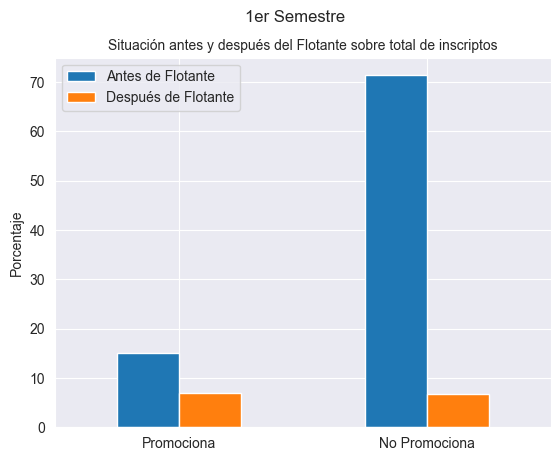

In [53]:
# Grafico los resultados de la tabla
antes_despues_1S.plot(
    x="Condición",
    kind="bar"
)
plt.title("Situación antes y después del Flotante sobre total de inscriptos", size=10)
plt.suptitle("1er Semestre")
plt.xticks(rotation=0)
plt.xlabel("")
plt.ylabel("Porcentaje")
plt.show()

#### Desempeño en Flotantes

Completaremos el análisis del desempeño en Parciales estudiando **la distribución de notas en Flotantes y midiendo la efectividad de estas instancias en producir alumnos promocionados**.

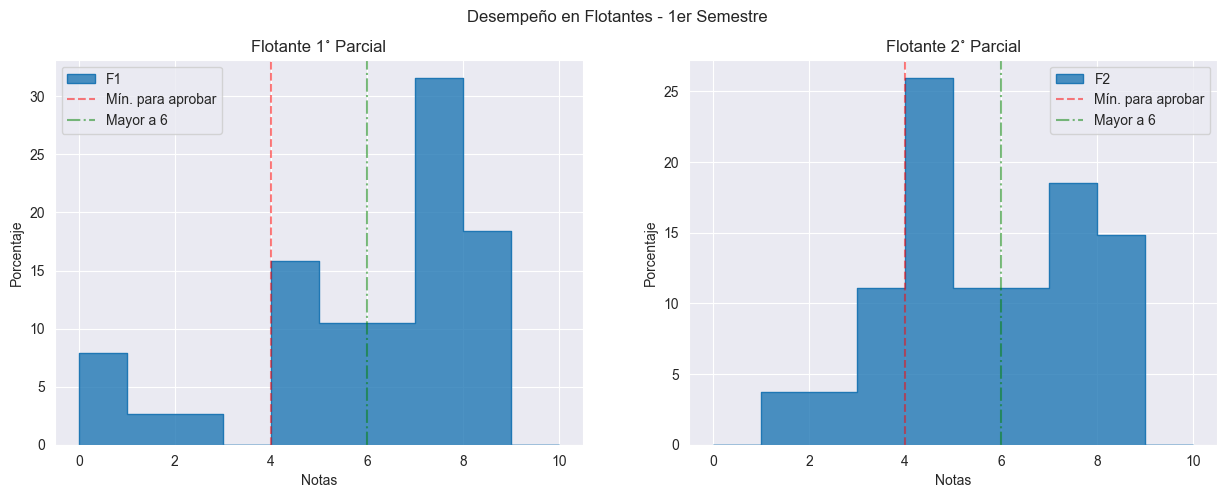

In [54]:
# Grafico la distribución de notas en Flotantes
generador_graficos(mate_pi, "1er Semestre")[3]

In [55]:
# Recordemos la tabla de desempeño por parciales
generador_tablas(mate_pi, "1er Semestre")[1]

,1P1F,1P2F,2P1F,2P2F,F1,F2
mean,2.45,1.67,3.01,3.33,6.00,5.60
std,2.53,1.87,2.66,2.64,2.38,1.89
median,1.70,1.00,2.70,3.30,6.85,5.60
Desaprobados (%),70.81,84.62,62.39,53.38,13.16,18.52
Aprobados (%),29.19,15.38,37.61,46.62,86.84,81.48
Mayor o igual a 6 (%),13.58,3.85,17.09,23.65,60.53,44.44


Observamos que en general **la mayor parte de los estudiantes que se presenta a Flotante aprueba**, tanto al recuperar Primer Parcial como recuperando el segundo: la tasa de aprobación en F1 es de 87% mientras quen en F2 es de 81%. Sin embargo, **quienes recuperan el Primer Parcial en Flotante obtienen notas más altas que quienes recuperan el Segundo Parcial**: el 61% de quienes rinden F1 obtienen nota mayor o igual a 6, mientras que en F2 lo logra el 44% de los estudiantes.

De todas formas, buscamos medir qué proporción de quienes rinden en Flotante logran la promoción:


In [56]:
# Filtro por quienes rinden Flotante
flotantes_1S = mate_pi[(mate_pi["Tipo_Cursada"]=="1er Semestre") & (mate_pi["F1"].notna() | mate_pi["F2"].notna())]

# Calculo proporciones de Promocionados y Desaprobados en cada Flotante
F1_1S = flotantes_1S[flotantes_1S["F1"].notna()].value_counts("Condicion", normalize=True).reset_index()
F2_1S = flotantes_1S[flotantes_1S["F2"].notna()].value_counts("Condicion", normalize=True).reset_index()

# Creo la tabla con los resultados
condicion_flotantes_1S = F1_1S.merge(F2_1S,
                                     how="left",
                                     on="Condicion",
                                     suffixes=["_F1", "_F2"])

In [57]:
condicion_flotantes_1S

,Condicion,proportion_F1,proportion_F2
0,Promocionado,0.578947,0.407407
1,Desaprobado,0.421053,0.592593
2,Abandonó,0.000000,0.000000
3,Libre,0.000000,0.000000


Extraemos las siguientes conclusiones:

- **La efectividad en el Flotante de Primer Parcial es de 58% de Promocionados**.
- **La efectividad en el Flotante de Segundo Parcial es de 41% de Promocionados**.
- Como se desprendía de los gráficos anteriores, los estudiantes obtienen mejores notas en F1 que en F2, y **la mayoría de quienes recuperan Primer Parcial en el Flotante promocionan, no así quienes rinden el Segundo Parcial**.

## Modalidad Anticipada

Esta modalidad de cursada se ofrece entre agosto y noviembre, en el segundo semestre del año. Usualmente **se compone en su mayoría de alumnos que están crusando el secundario y desean "adelantar" la primera materia de la facultad**. Sin embargo, también puede haber presentes alumnos recursantes, y no se dispone de información respecto a la proporción de estudiantes de secundario y recursantes dentro del dataset.

### Distribución por Condición

In [58]:
# Obtengo los gráficos correspondientes:
graficos = generador_graficos( mate_pi, "Anticipada")

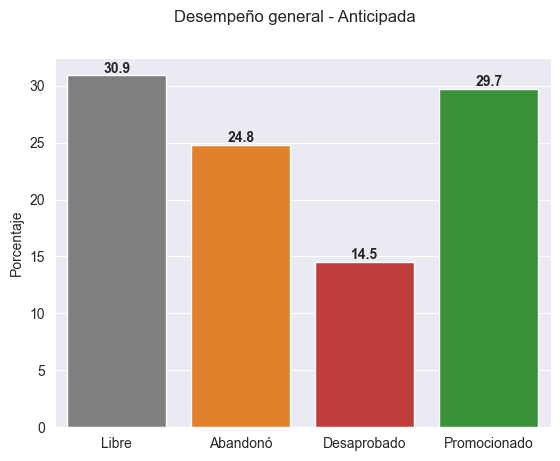

In [59]:
# Distribución por Condición para modalidad Anticipada:
fig = graficos[0]
display(fig)

Comparemos con los resultados obtenidos por el global de la materia.

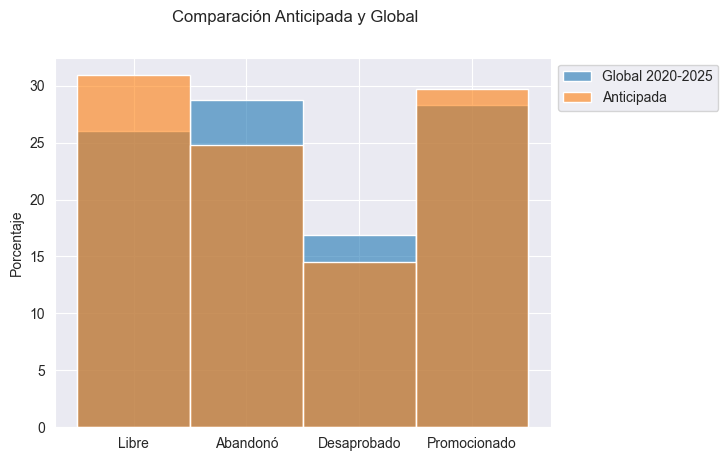

In [60]:
# Grafico en simultáneo histogramas de Anticipada y de Global de la materia
fig = graficos[1]
display(fig)

In [61]:
# Creo la tabla para comparar porcentajes
tabla_Ant = generador_tablas(mate_pi, "Anticipada")[0]
tabla_Ant

,Global,Anticipada,Dif. en ptos. porcentuales,Variación (%)
Condicion,,,,
Libre,26.0,30.9,4.9,18.8
Abandonó,28.7,24.8,-3.9,-13.6
Desaprobado,16.9,14.5,-2.4,-14.2
Promocionado,28.3,29.7,1.4,4.9


Notemos que:

- **La tasa de promocionados en la modalidad Anticipada es similar al promedio general**, mostrando una diferencia de 1.4 puntos porcentuales.
- Sin embargo, **se evidencia un aumento significativo en la cantidad de alumnos Libres**, del 18.8% respecto al promedio general, que se condice con una disminución en la cantidad de alumnos que abandonaron o desaprobaron.

En general puede concluirse que la modalidad Anticipada presenta una efectividad similar al promedio de la materia, pero una mayor proporción de alumnos que quedan libres. Corresponde con estudiantes que se inscriben pero no cursan la materia, o abandonan incluso antes del primer parcial. Sin embargo, quienes continúan en la cursada muestran un buen desempeño, con tasas de abandono y desaprobación menores que el promedio de la materia.

### Permanencia

Nos interesa **analizar la tasa de abandonos a lo largo de la cursada**: identificar en qué instancia es mayor la deserción en la materia. Para ello, calcularemos nuevas columnas según si el alumno se encuentra Activo en la cursada. Usaremos el siguiente criterio:

- La cursada estará dividida en 5 Etapas, y en cada una **el alumno se considera Activo** si:
    - **Etapa 0:** rinde Primera Fecha del Primer Parcial o alguna posterior
    - **Etapa 1:** rinde Recup. del Primer Parcial o alguna posterior, o ya aprobó en Primera Fecha
    - **Etapa 2:** rinde Primera Fecha del Segundo Parcial o alguna posterior
    - **Etapa 3:** rinde Recup. del Segundo Parcial o alguna posterior, o ya aprobó en Primera Fecha
    - **Etapa 4:** rinde Flotante o ya Promocionó/Desaprobó.
- En cada Etapa: **se asigna `True` si el alumno está Activo.**

Los detalles de la construcción de las columnas puede verse en los comentarios del código usado para definir la función `columnas_por_etapas`.

In [62]:
matepi_Ant = columnas_por_etapas( mate_pi, "Anticipada" )
matepi_Ant.head()

,1P1F,1P2F,2P1F,2P2F,F1,F2,Condicion,Final,Año,Tipo_Cursada,Virtual,Oral,Grupo,Etapa 0,Etapa 1,Etapa 2,Etapa 3,Etapa 4
108,8.7,NaN,7.90,NaN,NaN,NaN,Promocionado,9,2020,Anticipada,1,Aprobado,NaN,True,True,True,True,True
109,6.6,NaN,NaN,NaN,NaN,NaN,Abandonó,0,2020,Anticipada,1,NaN,NaN,True,True,False,False,False
110,6.0,NaN,7.95,NaN,NaN,NaN,Promocionado,8,2020,Anticipada,1,Aprobado,NaN,True,True,True,True,True
111,5.9,NaN,5.20,4.4,NaN,8.3,Promocionado,8,2020,Anticipada,1,Aprobado,NaN,True,True,True,True,True
112,5.3,NaN,4.30,3.3,NaN,5.2,Desaprobado,0,2020,Anticipada,1,NaN,NaN,True,True,True,True,True


En lo siguiente calcularemos la **curva de supervivencia**, entendida como la evolución del porcentaje de Alumnos Activos durante el desarrollo de la cursada.

In [63]:
Etapas = ["Etapa " + str(i) for i in range(5)]
# Calculo el porcentaje de alumnos activos en cada etapa como Activos/Inscriptos
inscriptos_Ant = matepi_Ant.shape[0]
supervivencia_Ant = (matepi_Ant[ Etapas ].sum() / inscriptos_Ant).round(3) * 100
# Construyo un DataFrame para la curva de supervivencia:
supervivencia_Ant = supervivencia_Ant.reset_index()
supervivencia_Ant = supervivencia_Ant.rename(columns = {"index":"Etapas", 0:"Porcentaje de Activos"})

In [64]:
# Calculo variaciones en el porcentaje de alumnos activos y tasa de abandono total en cada etapa
# Referencia: Etapa 0
supervivencia_Ant.loc[0, "Variacion"] = supervivencia_Ant.loc[0, "Porcentaje de Activos"] - 100
# Para las demás etapas
for i in range(1,supervivencia_Ant.shape[0]):
    supervivencia_Ant.loc[i, "Variacion"] = supervivencia_Ant.loc[i, "Porcentaje de Activos"] - supervivencia_Ant.loc[i-1, "Porcentaje de Activos"]
# Tasa de abandono total:
supervivencia_Ant.loc[:, "Tasa de abandono total"] = 100 - supervivencia_Ant.loc[:, "Porcentaje de Activos"]
# Agrego tasa de promocionados en cada etapa
for etapa in Etapas:
    proporciones = matepi_Ant[ matepi_Ant[etapa] ].value_counts("Condicion", normalize=True)
    supervivencia_Ant.loc[ (supervivencia_Ant["Etapas"] == etapa), "Promocionados por etapa"] = (proporciones["Promocionado"]*100).round(1)
supervivencia_Ant

,Etapas,Porcentaje de Activos,Variacion,Tasa de abandono total,Promocionados por etapa
0,Etapa 0,68.4,-31.6,31.6,43.5
1,Etapa 1,62.8,-5.6,37.2,47.4
2,Etapa 2,49.4,-13.4,50.6,60.2
3,Etapa 3,45.4,-4.0,54.6,65.5
4,Etapa 4,44.3,-1.1,55.7,67.2


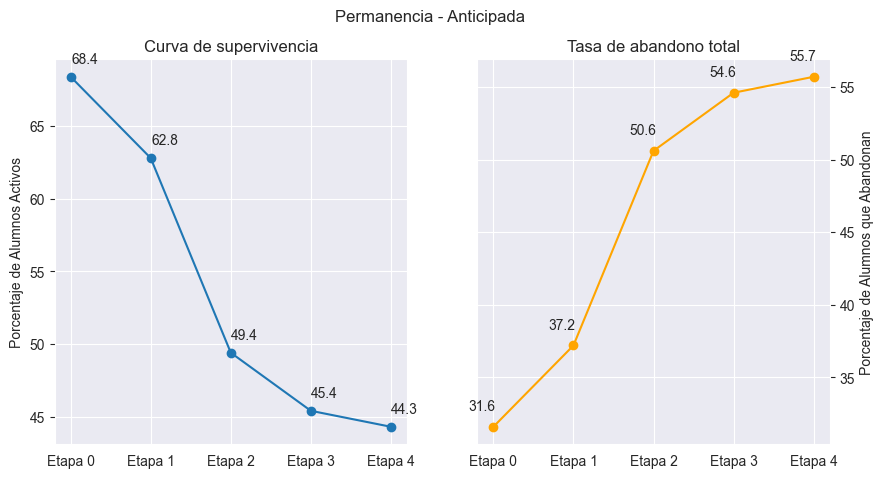

In [65]:
# Grafico curva de supervivencia y de tasa de abandono total
curvas_Ant = curva_supervivencia( supervivencia_Ant, "Anticipada" )
display(curvas_Ant)

Podemos extraer **algunas conclusiones respecto a la retención en los cursos de la modalidad Anticipada**:

- En la Etapa 0, correspondiente a la Primera Fecha del Primer Parcial, ya se observa una disminución respecto a la totalidad de alumnos inscriptos, y es la mayor caída a lo largo del curso, de 31.6 puntos porcentuales.
- **La segunda mayor caída en alumnos Activos se observa entre el Recuperatorio del Primer Parcial y la Primera Fecha del Segundo, correspondiente a 13.4 puntos porcentuales**. Son alumnos que han cursado la materia y decidieron abandonar durante el período entre Primer Parcial y Segundo Parcial.
- **La mayor cantidad de estudiantes se pierden antes siquiera de la primera fecha de exámenes: son los alumnos Libres**. Estos pueden haber asistido a clases, o incluso haberse inscripto pero nunca presentarse. No disponemos de información para realizar tales distinciones.
- - **De quienes llegan a la Etapa 0, el 43.5% logra promocionar la materia**: es la tasa de promocionados sin considerar alumnos libres. Se observa que **la tasa de promocionados sobre alumnos activos es notoriamente mayor a la calculada sobre el total de inscriptos**, en más de 13 puntos porcentuales.
- **La tasa de abandono entre Primeras Fechas y Recuperatorios es similar para ambos parciales**, correspondiente a aproximadamente una diferencia de 5.6 y 4 puntos porcentuales de Alumnos Activos respectivamente.
- Llegados a la mitad del curso, se observa una retención del 49.4% de los alumnos.
- **Hay un mayor abandono luego del Primer Parcial que luego del Segundo**:
    - Al momento de la Primera Fecha del Primer Parcial (Etapa 0), se observa una tasa de abandono del 31.6%
    - Al momento del Segundo Parcial (Etapa 2), luego de las dos instancias del Primero, la tasa de abandono total aumentó al 50.6%. Corresponde a 19 puntos porcentuales de diferencia.
    - Al momento del Flotante (Etapa 4), luego del Segundo Parcial, la tasa de abandono aumentó al 55.7%, únicamente 5.1 puntos porcentuales más.  
- **Menos de la mitad de los alumnos agotan las instancias de examen**, correspondiente al 44.3% del total de inscriptos. Ya hemos visto que **la mayoría de estos alumnos Promocionan la materia**: el 29.7% de los Inscriptos, aproximadamente un 67% de los Activos en ese momento. El restante 33% desaprueba la materia.

### Parciales

En esta sección analizaremos el **desempeño de los estudiantes en cada instancia de parcial**. Recordemos la nomenclatura correspondiente:

- Para aprobar la materia (*promocionar*), **el alumno debe aprobar el Primer Parcial y el Segundo Parcial, y obtener entre ambos una nota promedio mayor o igual a 6**.
- Para aprobar cada Parcial se necesita una nota mayor o igual a 4.
- **Cada parcial posee dos instancias: Primera Fecha y Segunda Fecha**. El alumno puede presentarse a rendir en ambas fechas, pero se considera válida la última nota que obtenga.
- **Si el alumno no aprobara ninguno de los Parciales, se considera que la materia está Desaprobada**.
- **Si el alumno aprobara sólo uno de los dos Parciales, puede recuperar el restante en la instancia de Flotante**.

En el dataset se tienen los resultados obtenidos en las columnas correspondientes:
- **1P1F**: nota del Primer Parcial, Primera Fecha. Si estuvo ausente el registro está vacío.
- **1P2F**: nota del Primer Parcial, Segunda Fecha. Si estuvo ausente el registro está vacío.
- **2P1F**: nota del Segundo Parcial, Primera Fecha. Si estuvo ausente el registro está vacío.
- **2P2F**: nota del Segundo Parcial, Segunda Fecha. Si estuvo ausente el registro está vacío.
- **F1**: nota del Flotante de Primer Parcial. Esta fecha permite recuperar el Primer Parcial si ya se logró aprobar el Segundo en las instancias anteriores. Si estuvo ausente el registro está vacío.
- **F2**: nota del Flotante de Segundo Parcial. Esta fecha permite recuperar el Segundo Parcial si ya se logró aprobar el Primero en las instancias anteriores. Si estuvo ausente el registro está vacío.

#### Estadísticas generales

In [66]:
# Obtengo la tabla con la comparación entre parciales
parciales_Ant = generador_tablas( mate_pi, "Anticipada")[1]
parciales_Ant

,1P1F,1P2F,2P1F,2P2F,F1,F2
mean,4.66,3.38,5.08,4.08,6.84,5.66
std,3.11,2.49,2.96,2.25,1.42,1.90
median,4.60,3.30,5.40,4.00,6.80,5.55
Desaprobados (%),42.14,59.70,35.47,48.91,0.00,22.22
Aprobados (%),57.86,40.30,64.53,51.09,100.00,77.78
Mayor o igual a 6 (%),37.50,20.15,43.35,20.65,73.33,47.22


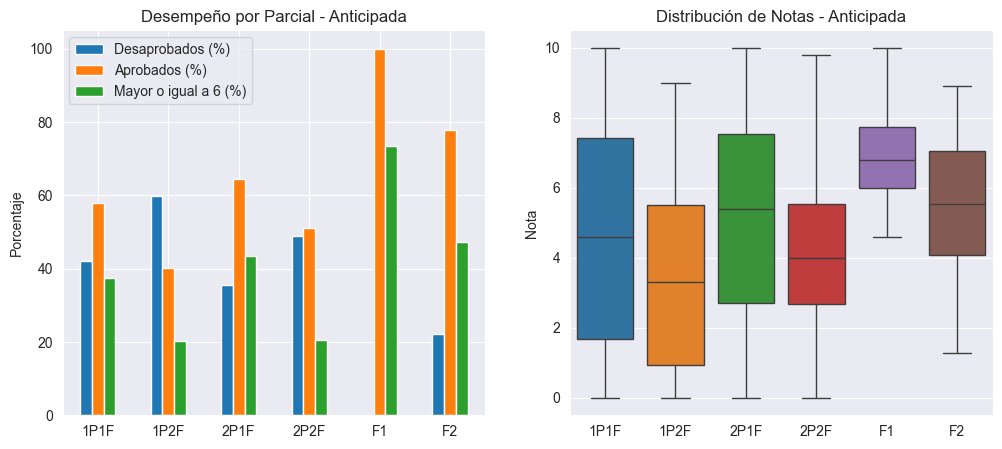

In [67]:
# Grafico los porcentajes de Aprobados y Desaprobados, y la distribución de notas de parciales
datos = parciales_Ant.transpose().reset_index() # Obtengo columna de labels como "index"
parciales = ["1P1F", "1P2F", "2P1F", "2P2F", "F1", "F2"]
Anticipada = mate_pi[ mate_pi["Tipo_Cursada"] == "Anticipada" ][parciales] # Parciales de Anticipada

fig, ax = plt.subplots(ncols=2, figsize=(12,5))
# Oculto mensajes de error: matplotlib identifica "F" como formato de timezone
with warnings.catch_warnings():
    warnings.simplefilter("ignore")
    # Desempeño por parcial
    datos.drop(columns=["mean", "std", "median"]).plot(
                                x="index",
                                kind="bar",
                                ax=ax[0])
    ax[0].tick_params(axis="x", labelrotation=0)
    ax[0].set_xlabel("")
    ax[0].set_ylabel("Porcentaje")
    ax[0].set_title("Desempeño por Parcial - Anticipada")
    # Distribución de notas
    sns.boxplot(data=Anticipada, ax=ax[1])
    ax[1].set_title("Distribución de Notas - Anticipada")
    ax[1].set_ylabel("Nota")
    plt.show()

Algunas conclusiones respecto al desempeño general en Anticipada:

- **El desempeño en Segundo Parcial es levemente mejor que en el Primero**:
    - El promedio en 1P1F es de 4.66 y se observa un 42% de Desaprobados. La situación empeora en 1P2F, siendo la nota promedio de 3.38 y el porcentaje de Desaprobados de 59.7%.
    - En 2P1F el promedio de notas es de 5.1 y desaprueba el 35.5%, y también se evidencia un peor desempeño en la Segunda Fecha, registrándose una nota promedio de 4.08 y una tasa de desaprobados de 53.4%.
    - **En ambos casos se observa una progresión a la baja de Aprobados entre Primera y Segunda Fecha, pero en promedio hay unos 6 puntos porcentuales de diferencia en Desaprobados a favor del Segundo Parcial**: el 50.8% desaprueba en 1P y el 44.4% lo hace en 2P. Además, **el Segundo Parcial muestra una relación positiva entre Aprobados/Desaprobados**, algo que en Primer Parcial ocurre sólo en la Primera Fecha.
- **Las peores notas se obtienen en la Segunda Fecha del Primer Parcial**, mientras que **el mejor desempeño es registrado durante el Flotante de Primer Parcial**.
- **La mayoría de quienes rinden Flotante aprueban en esa instancia**, mostrando tasas de aprobación de 100% en F1 y de 75.7% en F2. Sin embargo, **el desempeño es dispar en lo relativo a la consecución de notas altas**: el 73.3% consigue una nota mayor a 6 en F1 mientras que en F2 lo logra el 46%. **Resta analizar qué proporción de quienes rinden Flotante logran Promocionar** en esta instancia.
- En general **el desempeño en Primeras Fechas es bueno y decae en las Segundas Fechas**: en ambos parciales **más del 50% de quienes rinden Primera Fecha obtienen notas de aprobación**.

#### Evolución entre Primera Fecha y Segunda Fecha

Nos interesa analizar con detalle la **distribución de notas en Primer Parcial y en Segundo Parcial**, e identificar en qué proporción los alumnos mejoran su nota respecto a Primera y Segunda Fecha en cada Parcial

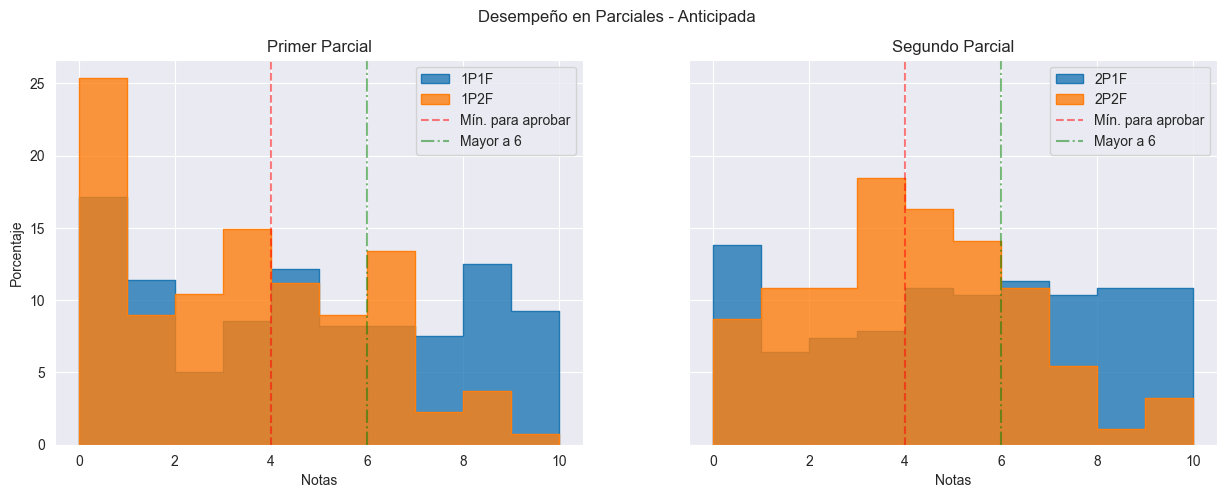

In [68]:
# Grafico las distribuciones de Primera Fecha y Segunda Fecha para cada Parcial
notas_Ant = generador_graficos( mate_pi, "Anticipada" )[2]
display(notas_Ant)

Es interesante notar que:

- **La Segunda Fecha del Primer Parcial muestra una leve asimetría a derecha**, que no se observa en los otros gráficos. En esa fecha **el 25% de los alumnos no logra sumar 1 punto**.
- Tanto en Primer como en Segundo Parcial, **la distribución de notas en Primera Fecha es prácticamente uniforme**. También en ambos casos se evidencia que **hay más alumnos accediendo a notas altas en la Primera Fecha que en la Segunda**.
- **La Segunda Fecha del Segundo Parcial muestra una distribución estándar** centrada en la nota mínima de aprobación de 4.

Veremos en lo siguiente qué proporción de alumnos que rinden Primera Fecha mejoran su nota al presentarse a Segunda Fecha.

In [69]:
# Filtro por Anticipada y Presentados a 1P2F
presentados1P2F_Ant = mate_pi[ (mate_pi["Tipo_Cursada"] == "Anticipada") & (mate_pi["1P2F"].notna()) ].copy()
# Creo columna Mejora_1P: True si aumenta su nota, False si no lo hace
presentados1P2F_Ant.loc[:,"Mejora 1P"] = (presentados1P2F_Ant["1P1F"] < presentados1P2F_Ant["1P2F"])
# Calculo porcentajes
mejora_1P = presentados1P2F_Ant["Mejora 1P"].value_counts(normalize=True) *100

# Lo mismo para Presentados a 2P2F
presentados2P2F_Ant = mate_pi[ (mate_pi["Tipo_Cursada"] == "1er Semestre") & (mate_pi["2P2F"].notna()) ].copy()
# Creo columna Mejora_1P: True si aumenta su nota, False si no lo hace
presentados2P2F_Ant.loc[:,"Mejora 2P"] = (presentados2P2F_Ant["2P1F"] < presentados2P2F_Ant["2P2F"])
# Calculo porcentajes
mejora_2P = presentados2P2F_Ant["Mejora 2P"].value_counts(normalize=True) *100

# Calculo qué porcentaje de los que mejoran nota logran aprobar
aprueba_1P = presentados1P2F_Ant[(presentados1P2F_Ant["Mejora 1P"]) & (presentados1P2F_Ant["1P2F"]>=4)]["1P2F"].count() \
                                                        / presentados1P2F_Ant[presentados1P2F_Ant["Mejora 1P"]].shape[0]

aprueba_2P = presentados2P2F_Ant[(presentados2P2F_Ant["Mejora 2P"]) & (presentados2P2F_Ant["2P2F"]>=4)]["2P2F"].count() \
                                                        / presentados2P2F_Ant[presentados2P2F_Ant["Mejora 2P"]].shape[0]

In [70]:
# Creo una tabla con los resultados
mejora_recu_Ant = pd.DataFrame(
    {"1P2F" : [mejora_1P[True].sum(), aprueba_1P*100],
     "2P2F" : [mejora_2P[True].sum(), aprueba_2P*100]},
    index = ["Mejora (%)", "Aprueba (%)"]
    )

In [71]:
mejora_recu_Ant

,1P2F,2P2F
Mejora (%),62.686567,61.486486
Aprueba (%),58.333333,70.329670


Observamos que:

- **En el Primer Parcial**: el 63% de quienes vuelven a rendir en Segunda Fecha logran mejorar su nota, y del ellos el 58% logra aprobarlo. **La mayor parte de los alumnos que vuelven a rendir mejora su nota y consigue aprobar el Parcial**.
- **En el Segundo Parcial**: el 61% de quienes vuelven a rendir en Segunda Fecha logran mejorar su nota, y de ellos el 70% consigue nota suficiente para aprobar. **La mayor parte de los alumnos que vuelven a rendir mejora su nota y consigue aprobar el Parcial**.

La evolución de los alumnos que vuelven a rendir luego de la Primera Fecha es similar en ambos parciales y el desempeño mejora significativamente entre Primera Fecha y Recuperatorio. Sin embargo, se observa una mayor dificultad en conseguir aprobar el Primer Parcial.

#### Promocionados antes y después del Flotante

**Analizaremos la tasa de alumnos promocionados en las instancias previas al Flotante y la correspondiente luego del Flotante**. Tengamos presente que para promocionar la materia es necesario aprobar Primer y Segundo Parcial, y promediar entre ambos una nota de 6 o más. Acceden al Flotante quienes hayan aprobado sólo uno de los Parciales, o tengan ambos aprobados pero no alcancen la nota suficiente para Promocionar.

**NOTA:** en las cursadas virtuales se requería también la condición de aprobar un examen Oral. **No incluiremos entre los Promocionados a quienes hayan Desaprobado el Oral.**

In [72]:
# Filtro por promocionados en Anticipada
condiciones = (mate_pi["Tipo_Cursada"] == "Anticipada") & (mate_pi["Condicion"] == "Promocionado")
promo_Ant = mate_pi[condiciones]

# Verifico si rindió alguna instancia de Flotante:
rinde_flotante_Ant = promo_Ant[["F1","F2"]].isna()\
                                .apply(sum, axis=1) # Sumo cantidad de True por filas

# Obtengo 2 si no se presentó a Flotante, y 1 si rindió F1 o F2. Calculo proporciones
antes_despues_prop_Ant = (rinde_flotante_Ant.value_counts() / promo_Ant.shape[0]) * 100 

# Genero la tabla con los resultados:
antes_despues_promo_Ant = pd.DataFrame({"Porcentajes":antes_despues_prop_Ant}).rename(index={2:"Antes de Flotante", 1:"Después de Flotante"}).rename_axis("Promocionados")

In [73]:
antes_despues_promo_Ant

,Porcentajes
Promocionados,
Antes de Flotante,81.889764
Después de Flotante,18.110236


Observamos que:

- **El 81.9% de los promocionados en el 1er Semestre lo hace en las instancias previas al Flotante**.
- **El 18.1% restante lo hace en la instancia de Flotante**.
- Recordemos que los Promocionados corresponden al 29.7% del total del Inscriptos, con lo que encontramos que aproximadamente el 24% de los inscriptos promociona antes del Flotante, el 5% lo hace en el Flotante, y el 71% de los inscriptos no promociona la materia. 

Notamos que la efectividad de las instancias de Parciales resulta ser muy elevada: **la mayoría de los alumnos que promociona lo hace antes del Flotante**. Por otro lado, resulta interesante analizar qué proporción de alumnos ya resulta desaprobado antes de la instancia de Flotante:

In [74]:
# Filtro por No promocionados en Anticipada
condiciones = (mate_pi["Tipo_Cursada"] == "Anticipada") & (mate_pi["Condicion"] != "Promocionado")
no_promo_Ant = mate_pi[condiciones]

# Verifico si rindió alguna instancia de Flotante:
rinde_flotante_Ant = no_promo_Ant[["F1","F2"]].isna()\
                                .apply(sum, axis=1) # Sumo cantidad de True por filas
# Obtengo 2 si no se presentó a Flotante, y 1 si rindió F1 o F2. Calculo proporciones
antes_despues_prop_Ant = (rinde_flotante_Ant.value_counts() / no_promo_Ant.shape[0]) * 100 

# Genero la tabla con los resultados:
antes_despues_no_promo_Ant = pd.DataFrame({"Porcentajes":antes_despues_prop_Ant}).rename(index={2:"Antes de Flotante", 1:"Después de Flotante"}).rename_axis("No Promociona")

In [75]:
antes_despues_no_promo_Ant

,Porcentajes
No Promociona,
Antes de Flotante,90.666667
Después de Flotante,9.333333


Notamos que **la gran mayoría de los alumnos inscriptos ya tiene resulta su situación antes del Flotante**:

- El 90.7% de quienes no aprueban la materia quedan fuera del curso antes del Flotante.
- Sólo el 9.3% de quienes no aprueban lo hace en el Flotante.
- Como se dijo anteriormente, el 71% del total de inscriptos no promociona la materia: aproximadamente el 64% de los inscriptos queda fuera de condición antes del Flotante, y el 7% lo hace luego del Flotante.

En conclusión, observamos que la mayoría de los alumnos que no promociona también resuelve su situación antes del Flotante: **sólo el 12% de los inscriptos define la promoción de la materia en la instancia de Flotante**.

In [76]:
# Creo tabla con el resumen de Condición antes y después de Flotante para Anticipada
antes_despues_Ant = pd.concat([antes_despues_promo_Ant.transpose(), antes_despues_no_promo_Ant.transpose()])\
                            .reset_index()\
                            .rename(columns={"index":"Condición"})
antes_despues_Ant.loc[:, "Condición"] = ["Promociona", "No Promociona"] 

# Calculo sobre porcentaje total de promocionados y no promocionados en 1er Semestre
prop_promo = promo_Ant.shape[0] / mate_pi[mate_pi["Tipo_Cursada"]=="Anticipada"].shape[0]
prop_no_promo = 1 - prop_promo

antes_despues_Ant.iloc[0,1:] = antes_despues_Ant.iloc[0,1:]*prop_promo
antes_despues_Ant.iloc[1,1:] = antes_despues_Ant.iloc[1,1:]*prop_no_promo

In [77]:
antes_despues_Ant

,Condición,Antes de Flotante,Después de Flotante
0,Promociona,24.355972,5.386417
1,No Promociona,63.700234,6.557377


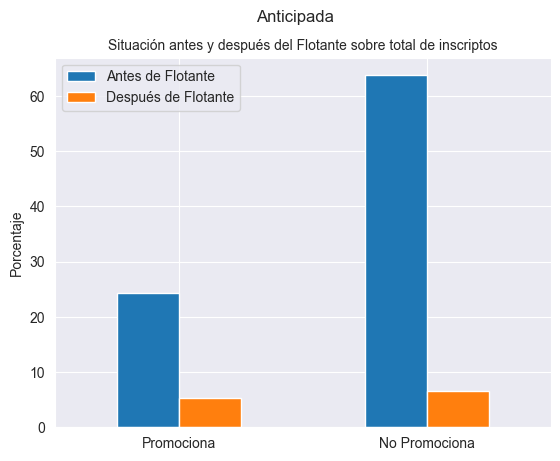

In [78]:
# Grafico los resultados de la tabla
antes_despues_Ant.plot(
    x="Condición",
    kind="bar"
)
plt.title("Situación antes y después del Flotante sobre total de inscriptos", size=10)
plt.suptitle("Anticipada")
plt.xticks(rotation=0)
plt.xlabel("")
plt.ylabel("Porcentaje")
plt.show()

#### Desempeño en Flotantes

Completaremos el análisis del desempeño en Parciales estudiando **la distribución de notas en Flotantes y midiendo la efectividad de estas instancias en producir alumnos promocionados**.

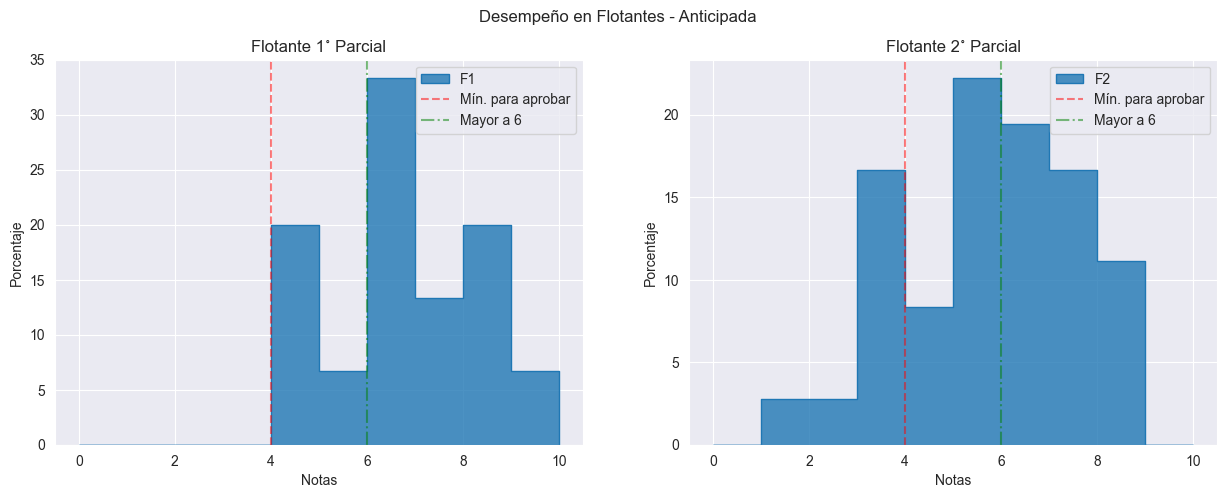

In [79]:
# Grafico la distribución de notas en Flotantes
generador_graficos(mate_pi, "Anticipada")[3]

In [80]:
# Recordemos la tabla de desempeño por parciales
generador_tablas(mate_pi, "Anticipada")[1]

,1P1F,1P2F,2P1F,2P2F,F1,F2
mean,4.66,3.38,5.08,4.08,6.84,5.66
std,3.11,2.49,2.96,2.25,1.42,1.90
median,4.60,3.30,5.40,4.00,6.80,5.55
Desaprobados (%),42.14,59.70,35.47,48.91,0.00,22.22
Aprobados (%),57.86,40.30,64.53,51.09,100.00,77.78
Mayor o igual a 6 (%),37.50,20.15,43.35,20.65,73.33,47.22


Observamos que en general **la mayor parte de los estudiantes que se presenta a Flotante aprueba**, tanto al recuperar Primer Parcial como recuperando el segundo: la tasa de aprobación en F1 es de 100% mientras quen en F2 es de 78%. Se observa una diferencia de 22 puntos porcentuales entre los aprobados en cada isntancia, y además **quienes recuperan el Primer Parcial en Flotante obtienen notas más altas que quienes recuperan el Segundo Parcial**: el 73% de quienes rinden F1 obtienen nota mayor o igual a 6, mientras que en F2 lo logra el 47% de los estudiantes.

Buscamos medir qué proporción de quienes rinden en Flotante logran la promoción:

In [81]:
# Filtro por quienes rinden Flotante
flotantes_Ant = mate_pi[(mate_pi["Tipo_Cursada"]=="Anticipada") & (mate_pi["F1"].notna() | mate_pi["F2"].notna())]

# Calculo proporciones de Promocionados y Desaprobados en cada Flotante
F1_Ant = flotantes_Ant[flotantes_Ant["F1"].notna()].value_counts("Condicion", normalize=True).reset_index()
F2_Ant = flotantes_Ant[flotantes_Ant["F2"].notna()].value_counts("Condicion", normalize=True).reset_index()

# Creo la tabla con los resultados
condicion_flotantes_Ant = F1_Ant.merge(F2_Ant,
                                       how="left",
                                       on="Condicion",
                                       suffixes=["_F1", "_F2"])

In [82]:
condicion_flotantes_Ant

,Condicion,proportion_F1,proportion_F2
0,Promocionado,0.6,0.388889
1,Desaprobado,0.4,0.611111
2,Abandonó,0.0,0.000000
3,Libre,0.0,0.000000


Extraemos las siguientes conclusiones:

- **La efectividad en el Flotante de Primer Parcial es de 60% de Promocionados**.
- **La efectividad en el Flotante de Segundo Parcial es de 39% de Promocionados**.
- Como se desprendía de los gráficos anteriores, los estudiantes obtienen mejores notas en F1 que en F2, y **la mayoría de quienes recuperan Primer Parcial en el Flotante promocionan, no así quienes rinden el Segundo Parcial**.

## Comparación entre Modalidades

**Tabla comparativa de principales resultados**

In [136]:
# Voy a generar una tabla con las estadísticas sobre cursadas. En lo posible agrego Verano
compara_cursadas = pd.DataFrame(index=["Promocionado", 
                                       "Desaprobado", 
                                       "Abandonó", 
                                       "Libre", 
                                       "Nota Final Promedio", 
                                       "Promocionados sobre Activos",
                                       "Activos al Primer Parcial",
                                       "Activos al Segundo Parcial",
                                       "Activos al Flotante"],
                                columns=["Verano", "1er Semestre", "Anticipada"])
# Agrego la información ya calculada en funciones
for cursada in ["Verano", "1er Semestre", "Anticipada"]:
    temp = generador_tablas( mate_pi, cursada )[0]
    for i in temp.index:
        compara_cursadas.loc[i, cursada] = temp.loc[i, cursada]
    # Agrego Nota Final Promedio
    compara_cursadas.loc["Nota Final Promedio", cursada] = \
                        mate_pi[ mate_pi["Tipo_Cursada"]==cursada ]["Final"].replace({0:np.nan}).mean().round(2)
# Agrego Promocionados sobre Activos
compara_cursadas.loc["Promocionados sobre Activos", "1er Semestre"] = supervivencia_1S.loc[0, "Promocionados por etapa"]
compara_cursadas.loc["Promocionados sobre Activos", "Anticipada"] = supervivencia_Ant.loc[0, "Promocionados por etapa"]
# Agrego Activos al 1P, 2P y Flotante
# 1er Semestre
compara_cursadas.loc["Activos al Primer Parcial", "1er Semestre"] = supervivencia_1S.loc[0, "Porcentaje de Activos"]
compara_cursadas.loc["Activos al Segundo Parcial", "1er Semestre"] = supervivencia_1S.loc[2, "Porcentaje de Activos"]
compara_cursadas.loc["Activos al Flotante", "1er Semestre"] = supervivencia_1S.loc[4, "Porcentaje de Activos"]
# Anticipada
compara_cursadas.loc["Activos al Primer Parcial", "Anticipada"] = supervivencia_Ant.loc[0, "Porcentaje de Activos"]
compara_cursadas.loc["Activos al Segundo Parcial", "Anticipada"] = supervivencia_Ant.loc[2, "Porcentaje de Activos"]
compara_cursadas.loc["Activos al Flotante", "Anticipada"] = supervivencia_Ant.loc[4, "Porcentaje de Activos"]

compara_cursadas.transpose()

,Promocionado,Desaprobado,Abandonó,Libre,Nota Final Promedio,Promocionados sobre Activos,Activos al Primer Parcial,Activos al Segundo Parcial,Activos al Flotante
Verano,36.1,15.2,25.9,22.8,7.39,NaN,NaN,NaN,NaN
1er Semestre,22.0,20.1,34.1,23.8,6.71,28.8,76.2,51.7,42.1
Anticipada,29.7,14.5,24.8,30.9,7.58,43.5,68.4,49.4,44.3


# Conclusiones preliminares

1. **Libres**  
   - En la modalidad **Anticipada** se observa una **proporción más alta de Libres** en comparación con el 1er Semestre.  
   - Esto sugiere menor compromiso inicial o más dificultad para sostener la cursada en esa modalidad: corresponde con alumnos que, en su mayoría, todavía están cursando el colegio secundario. 
2. **Abandono**  
   - El **1er Semestre** presenta una **tasa de abandono intermedio mayor**, es decir, más alumnos comienzan pero no completan todas las instancias de evaluación.  
   - Esto coincide con la idea de que el **1er parcial actúa como filtro fuerte** en esta modalidad.  
3. **Desaprobados**  
   - La tasa de **desaprobación** es relativamente más baja en **Anticipada**, lo cual indica que, si bien muchos no llegan a rendir, quienes lo hacen tienden a obtener mejores resultados.  
4. **Promocionados**  
   - El **Verano** muestra la mayor tasa de promocionados entre las tres modalidades.
   - La modalidad **Anticipada muestra una mayor tasa de promoción** respecto al 1er Semestre.  
   - Esto sugiere que, aunque hay más Libres, quienes persisten en la cursada Anticipada tienden a desempeñarse mejor.  
5. **Notas finales**  
   - El promedio de notas finales es **ligeramente más alto en Anticipada**.  
   - Refuerza la idea de que, aunque la retención inicial sea menor, los estudiantes que permanecen presentan un rendimiento académico más sólido. 

In [ ]:
# En construcción